In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
import pylab
from distfit import distfit

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE

from sklearn.inspection import permutation_importance


import pickle

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv(r'data/bankrupt_dataset.csv',delimiter=',', decimal='.')

In [4]:
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9

Bankrupt?                                                       AxesSubplot(0.125,0.84472;0.110714x0.0352804)
 ROA(C) before interest and depreciation before interest     AxesSubplot(0.257857,0.84472;0.110714x0.0352804)
 ROA(A) before interest and % after tax                      AxesSubplot(0.390714,0.84472;0.110714x0.0352804)
 ROA(B) before interest and depreciation after tax           AxesSubplot(0.523571,0.84472;0.110714x0.0352804)
 Operating Gross Margin                                      AxesSubplot(0.656429,0.84472;0.110714x0.0352804)
                                                                                  ...                        
 Liability to Equity                                        AxesSubplot(0.257857,0.209673;0.110714x0.0352804)
 Degree of Financial Leverage (DFL)                         AxesSubplot(0.390714,0.209673;0.110714x0.0352804)
 Interest Coverage Ratio (Interest expense to EBIT)         AxesSubplot(0.523571,0.209673;0.110714x0.0352804)
 Net Incom

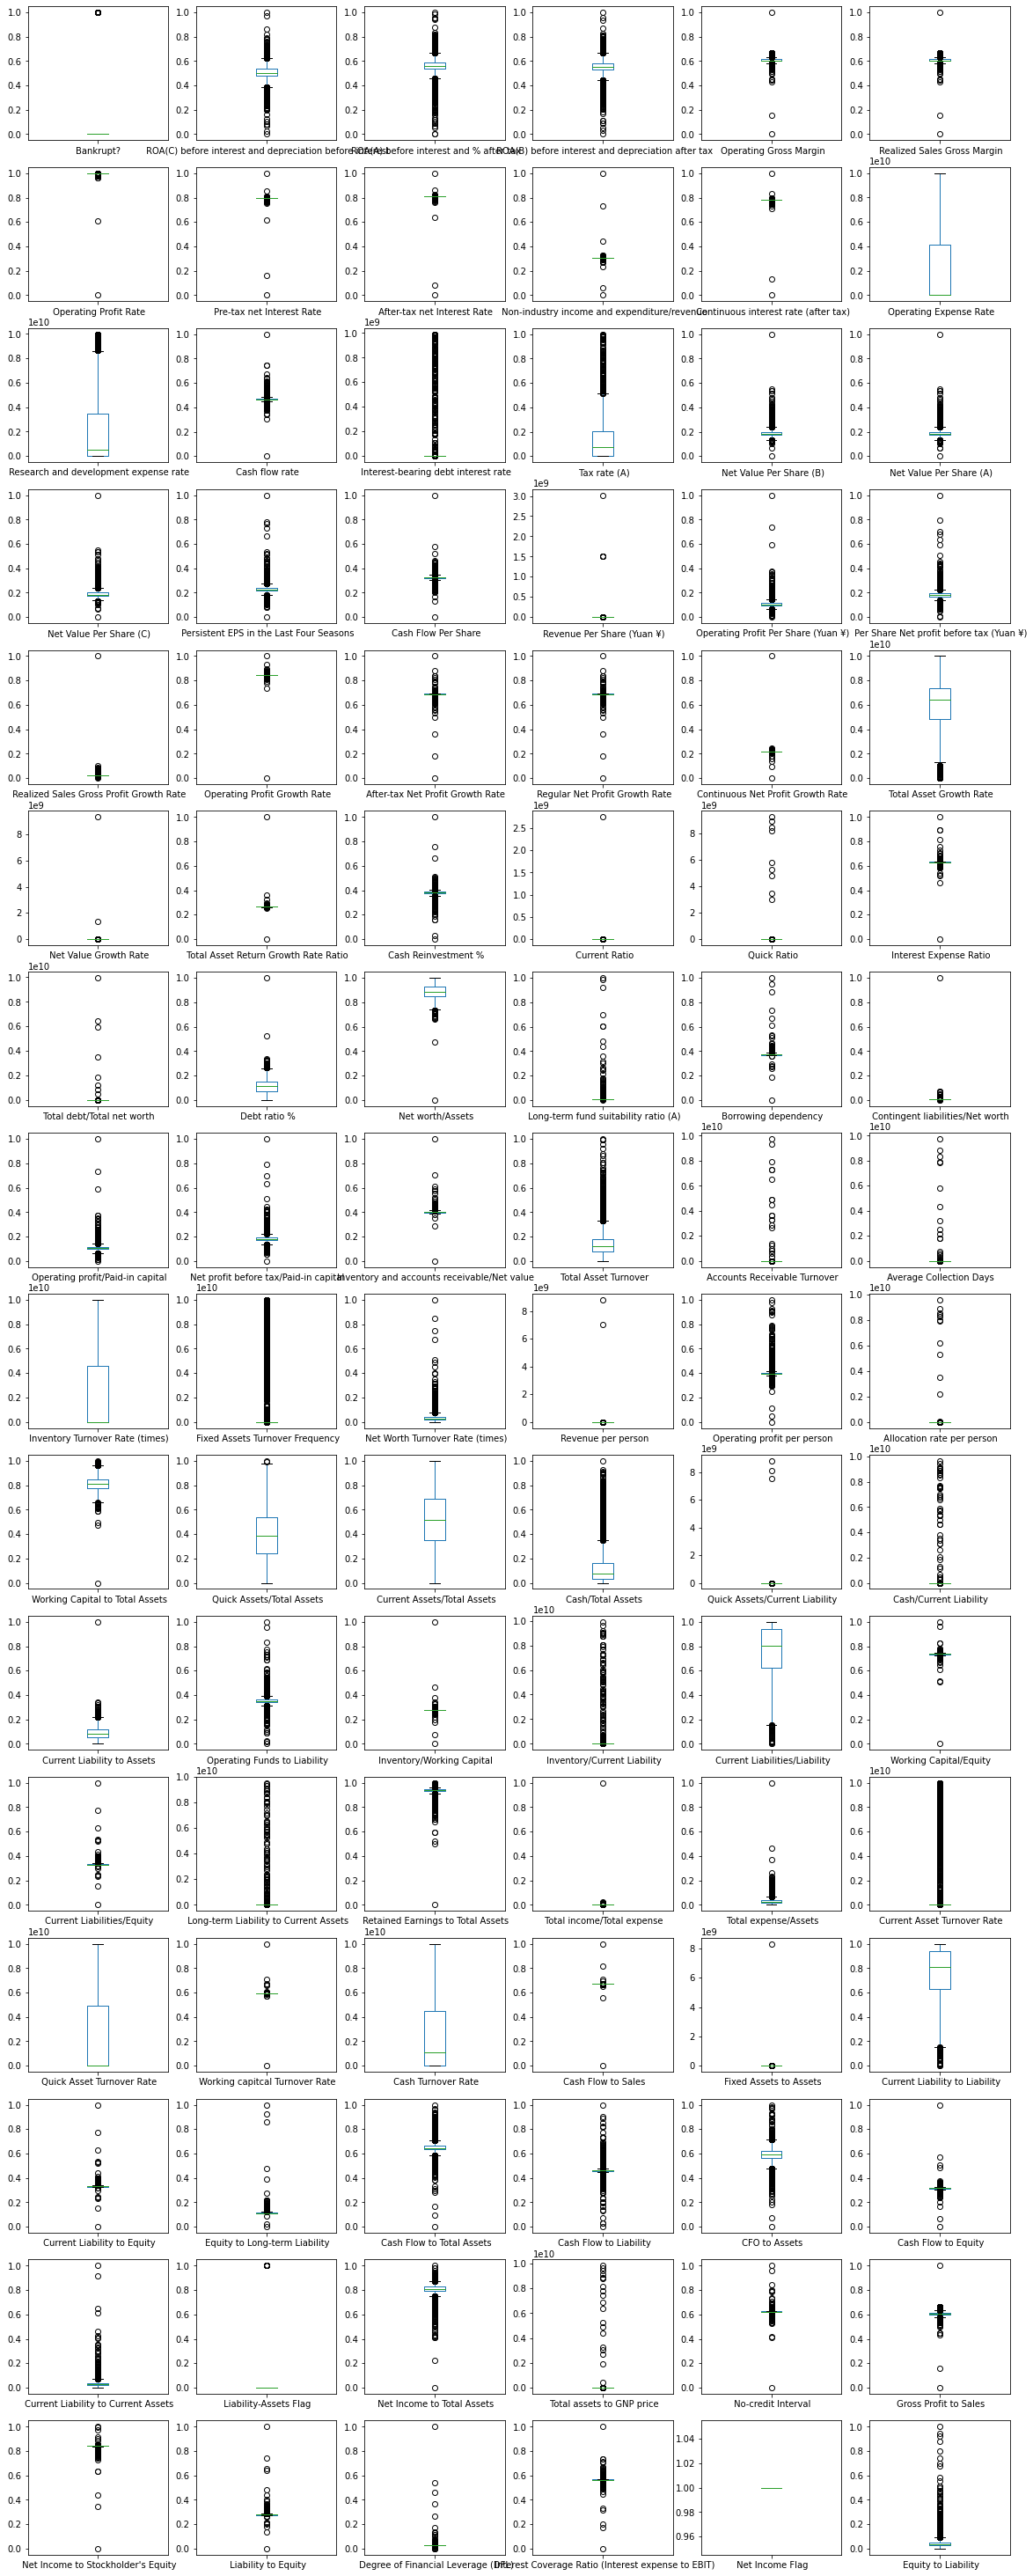

In [10]:
df.plot(kind='box', subplots=True, layout=(18, 6), figsize = (20, 60))

In [12]:
df = df.drop(' Net Income Flag', axis=1)

In [14]:
y = df['Bankrupt?']
X = df.drop('Bankrupt?',axis=1)

In [15]:
X20 = X[X.columns[:20]]
X40 = X[X.columns[20:40]] 
X60 = X[X.columns[40:60]] 
X80 = X[X.columns[60:80]]
X95 = X[X.columns[80:]] 

# Scaling

### Recherche d'automatisation du scaling : shapiro

In [25]:
# from scipy.stats import shapiro
# for c in range (0,95):
#     print(f'{c} : {shapiro(df.iloc[:, c])}')

### Recherche d'automatisation du scaling : kstest

In [27]:
# from scipy.stats import kstest, norm
# for col in X.columns:
#     ks_statistic, p_value = kstest(X[col], 'norm')
#     print(ks_statistic, p_value)

### Recherche d'automatisation du scaling : lilliefors

In [32]:
from statsmodels.stats.diagnostic import lilliefors
for col in X.columns:
    lillie = lilliefors(X[col])
#     print(lillie[0])
    print(X[col].name,lillie)

 ROA(C) before interest and depreciation before interest (0.0810473201195086, 0.0009999999999998899)
 ROA(A) before interest and % after tax (0.12162150105675099, 0.0009999999999998899)
 ROA(B) before interest and depreciation after tax (0.09635637332864766, 0.0009999999999998899)
 Operating Gross Margin (0.15986041261955997, 0.0009999999999998899)
 Realized Sales Gross Margin (0.16022268754870983, 0.0009999999999998899)
 Operating Profit Rate (0.4733379450422175, 0.0009999999999998899)
 Pre-tax net Interest Rate (0.46079666936176933, 0.0009999999999998899)
 After-tax net Interest Rate (0.46417501817862095, 0.0009999999999998899)
 Non-industry income and expenditure/revenue (0.459155772704147, 0.0009999999999998899)
 Continuous interest rate (after tax) (0.46247773590665897, 0.0009999999999998899)
 Operating Expense Rate (0.39721345602559155, 0.0009999999999998899)
 Research and development expense rate (0.22642937277432978, 0.0009999999999998899)
 Cash flow rate (0.1879259994226367, 0

In [33]:
norm_lillie=[]
nonnorm_lillie=[]
for col in X.columns:
    lillie = lilliefors(X[col])
    if lillie[0] < 0.16:
        norm_lillie.append(col)
    else:
        nonnorm_lillie.append(col)

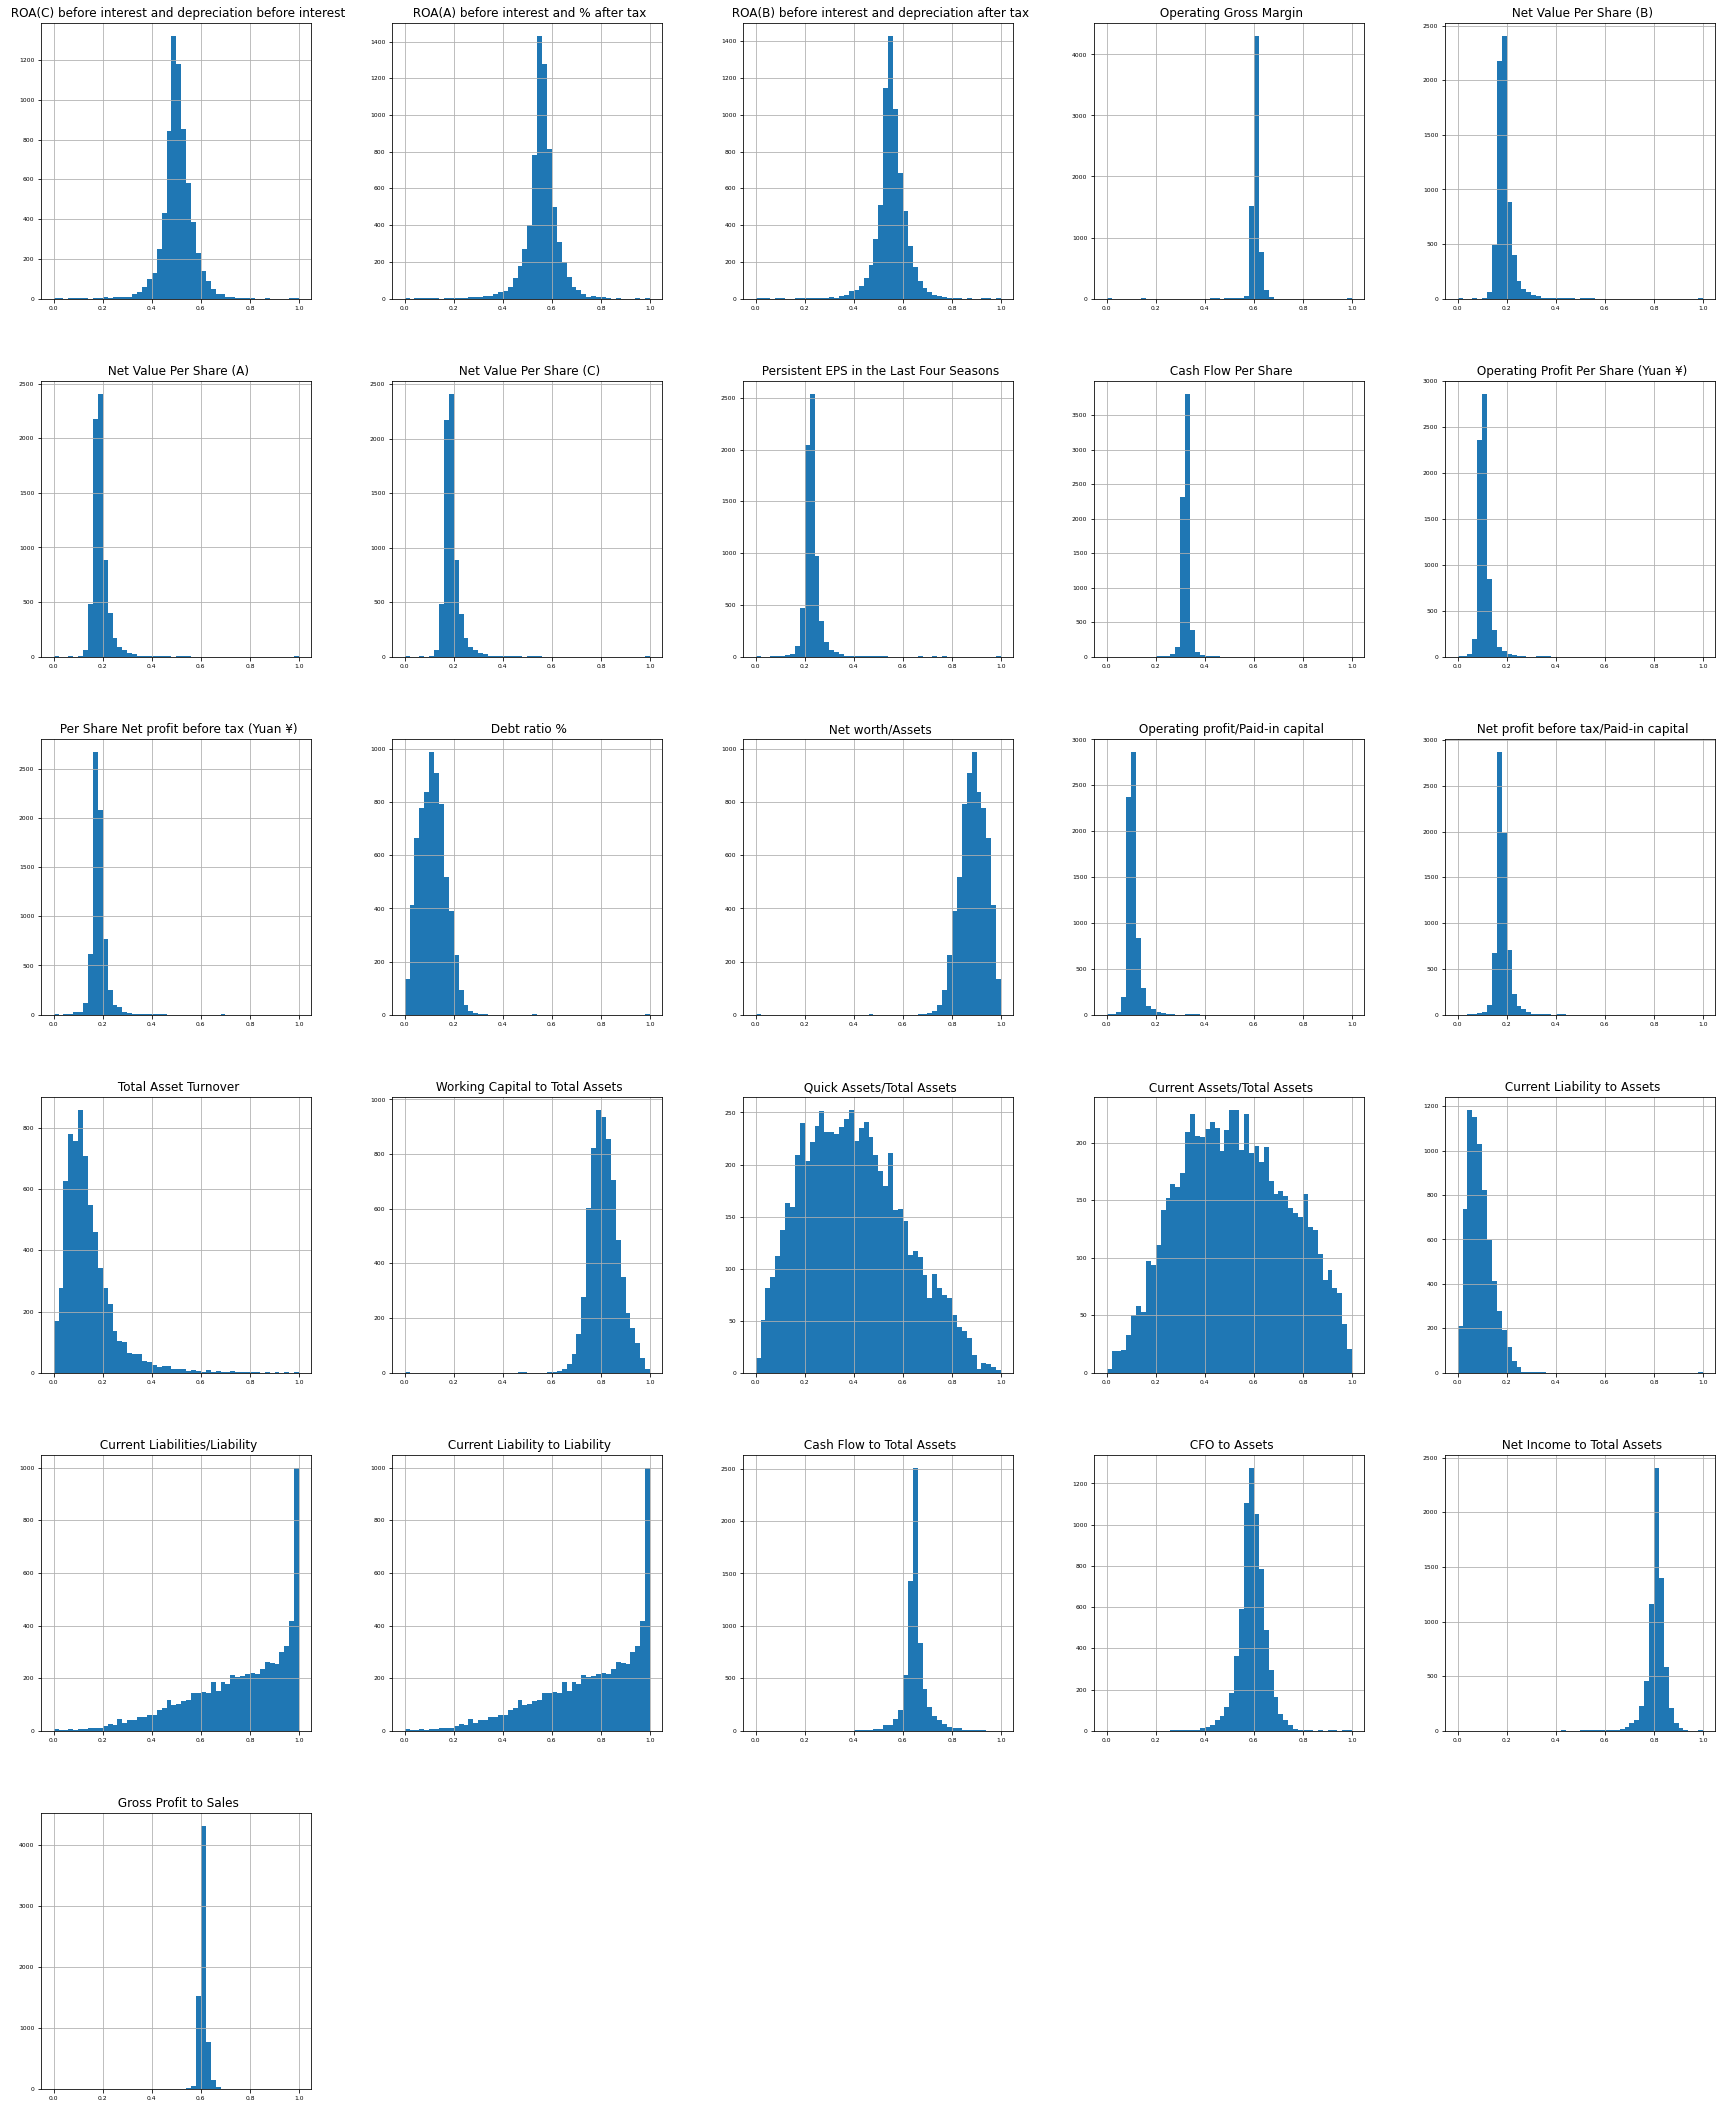

In [34]:
X[norm_lillie].hist(figsize=(30,38), bins=50, xlabelsize=6,ylabelsize=6)
plt.show()

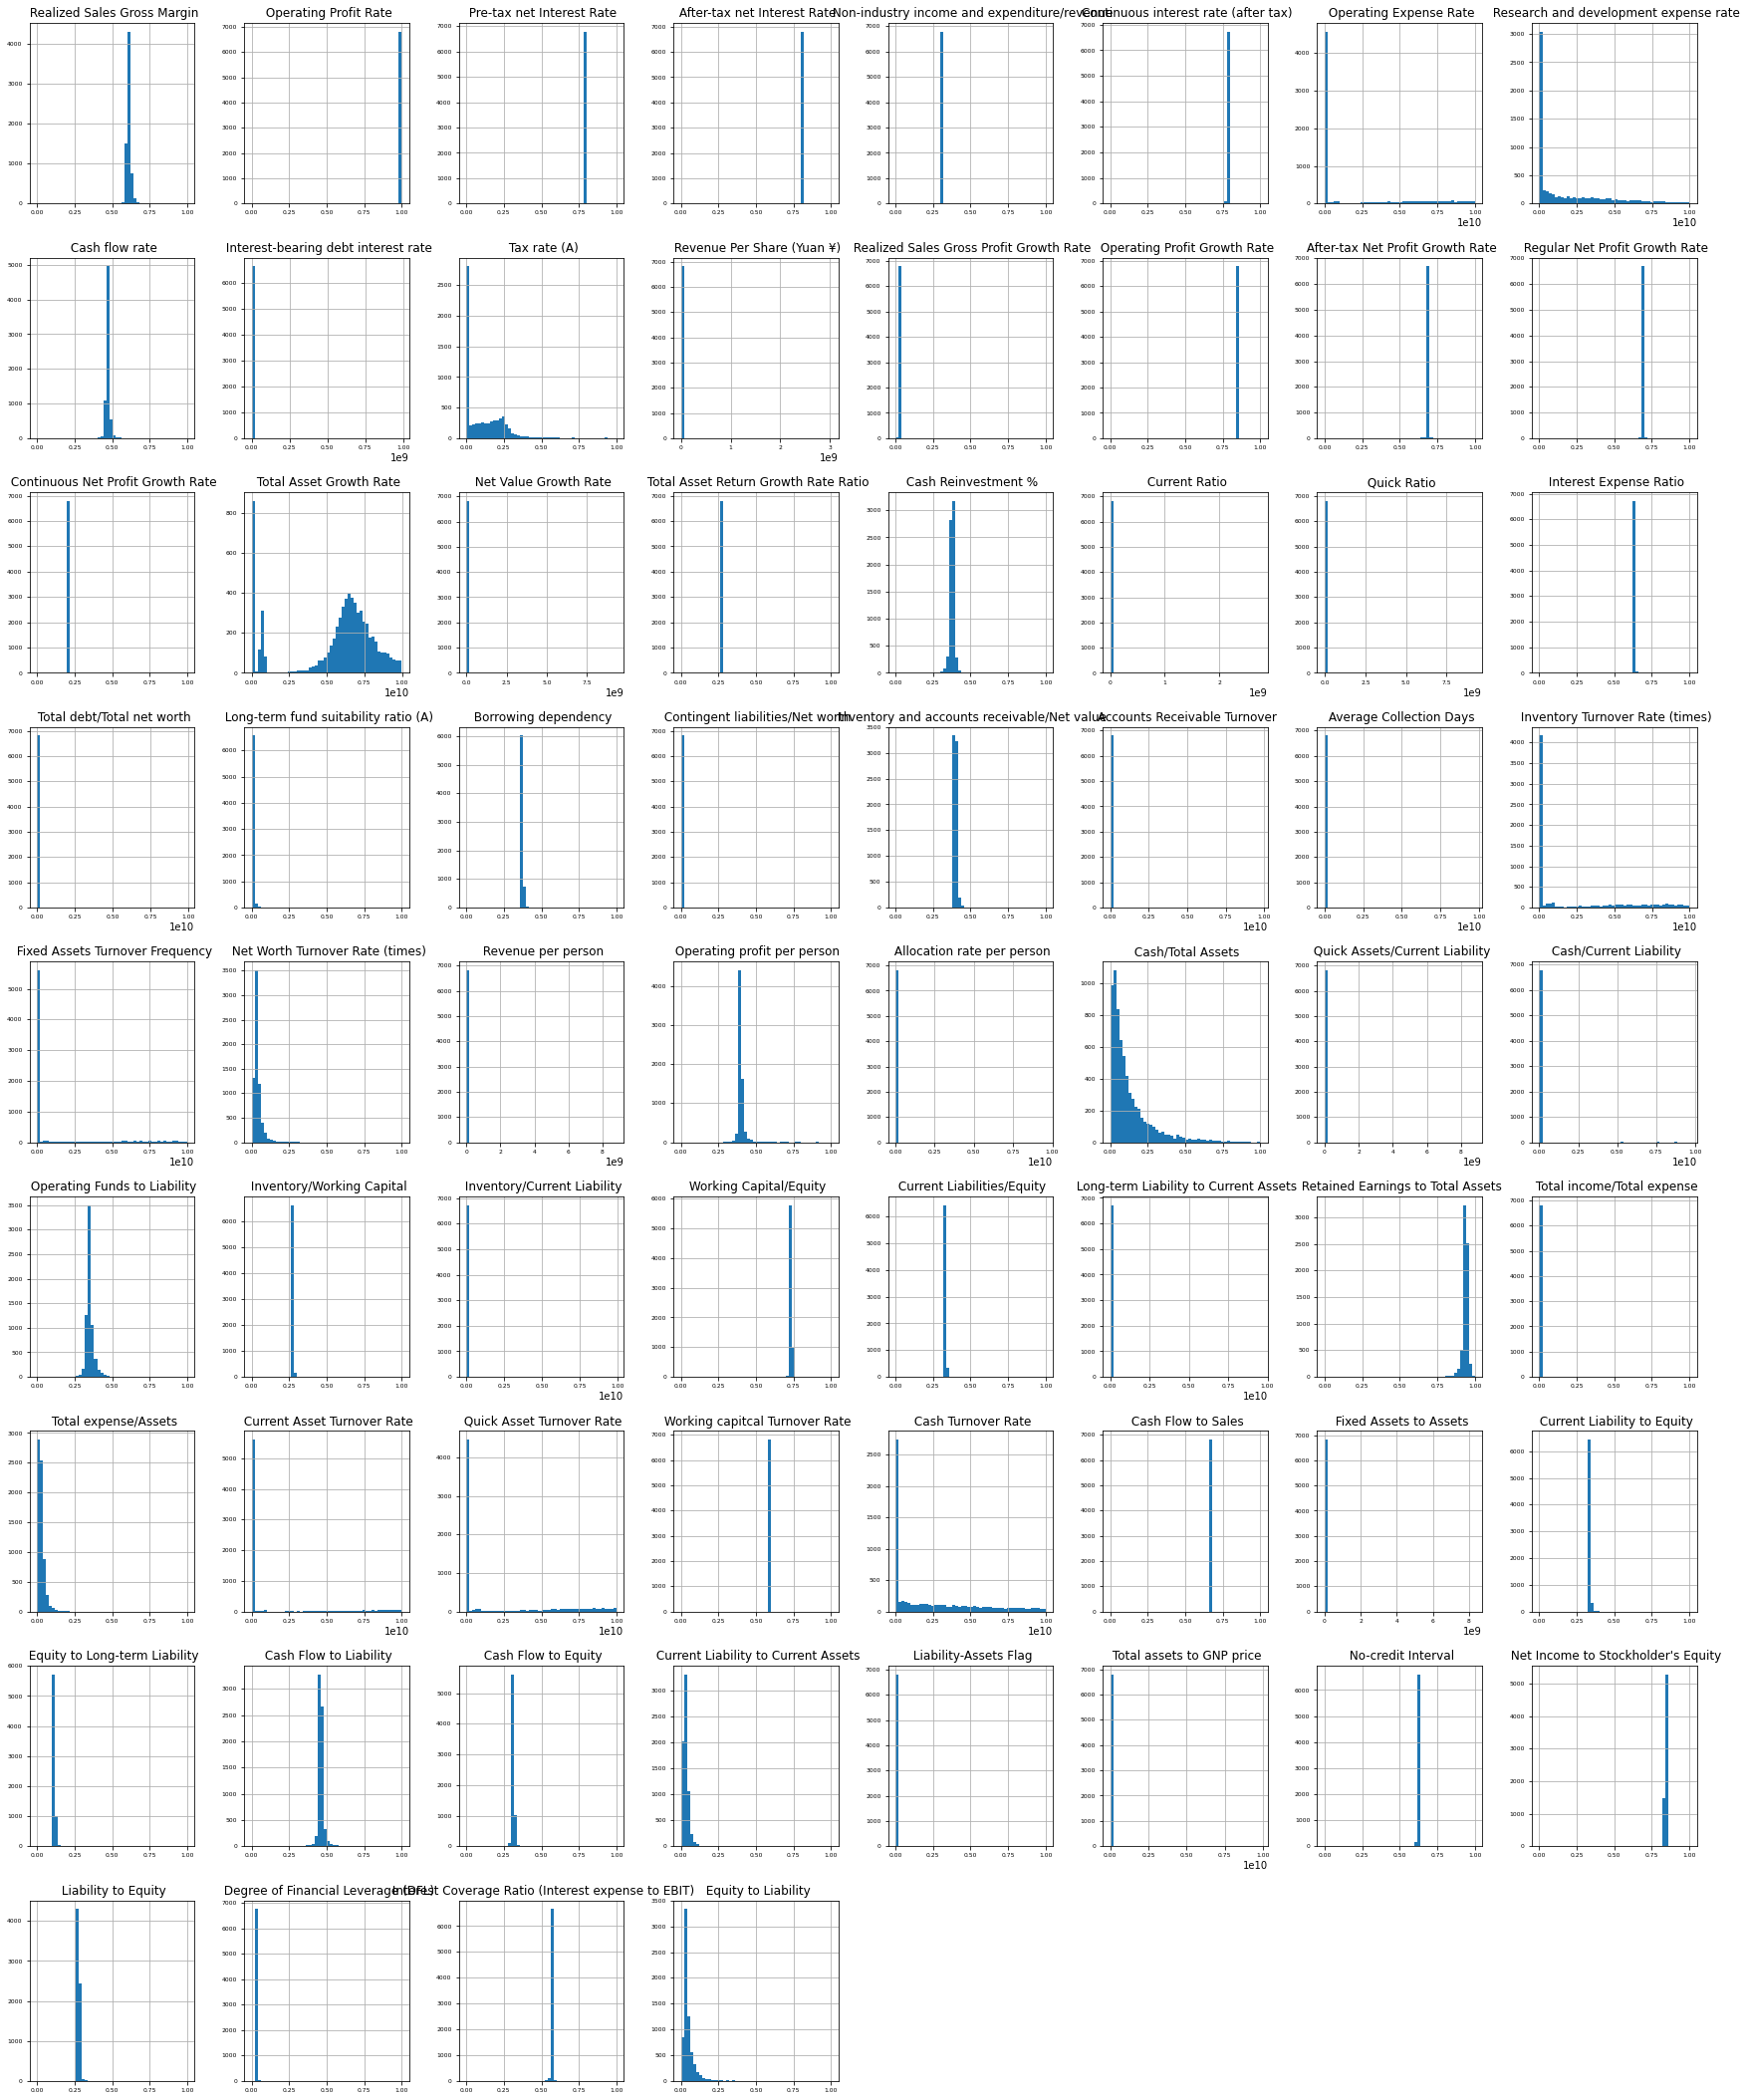

In [35]:
X[nonnorm_lillie].hist(figsize=(30,38), bins=50, xlabelsize=6,ylabelsize=6)
plt.show()

### Recherche d'automatisation du scaling : qqplot

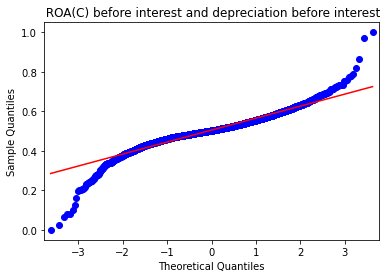

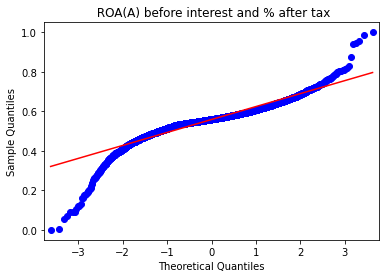

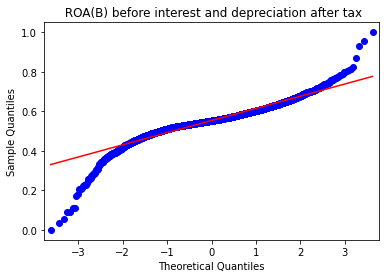

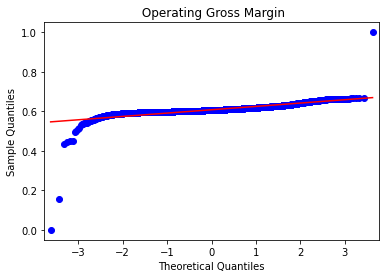

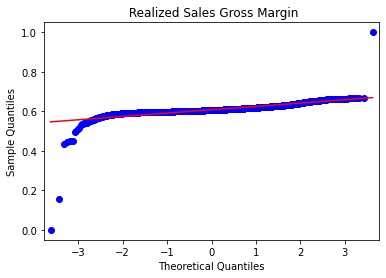

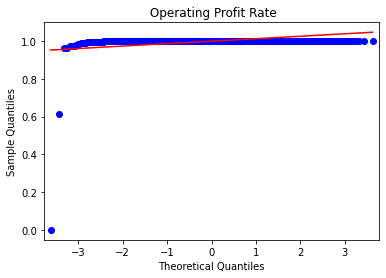

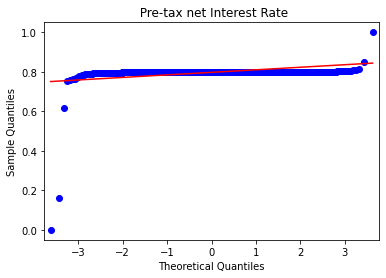

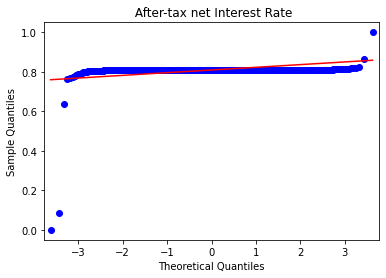

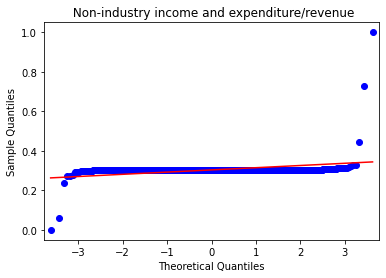

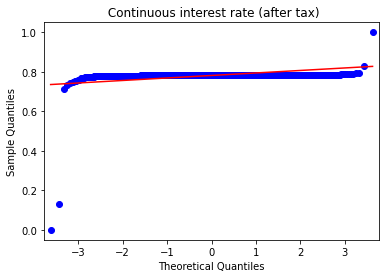

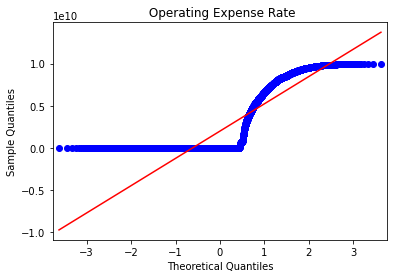

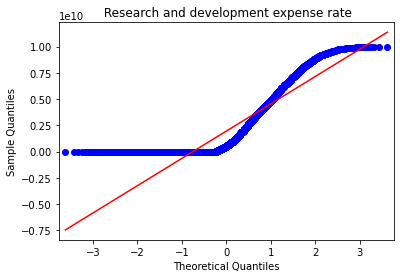

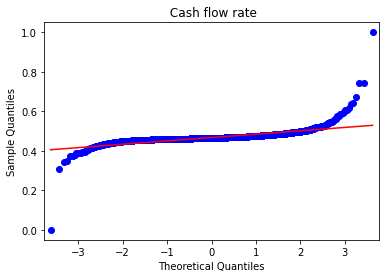

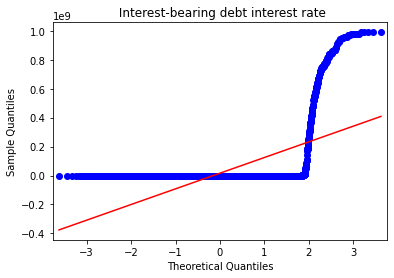

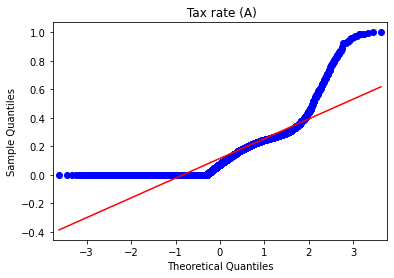

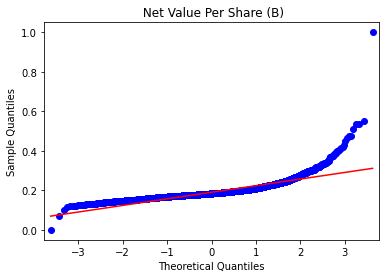

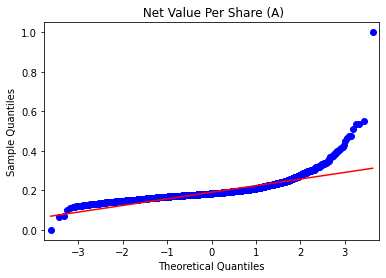

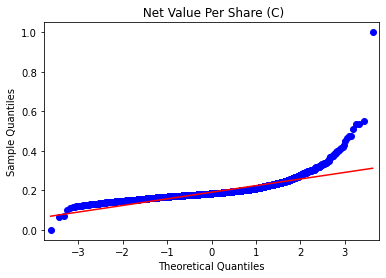

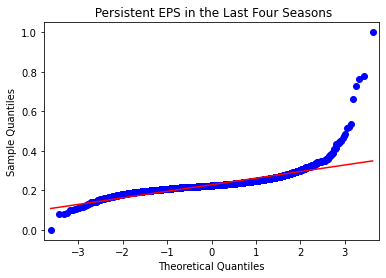

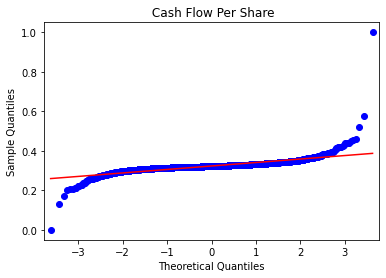

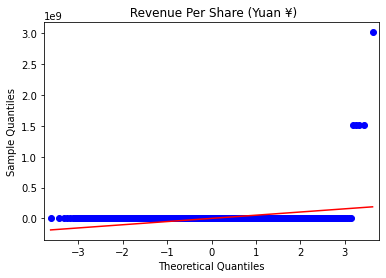

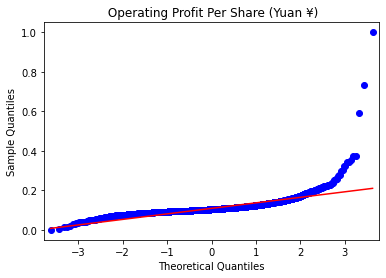

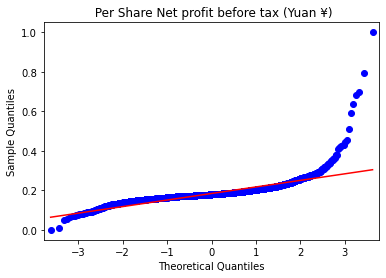

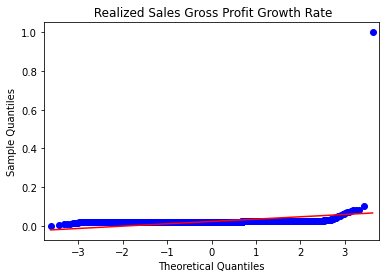

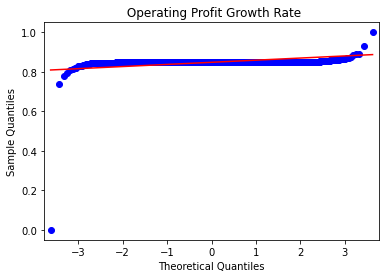

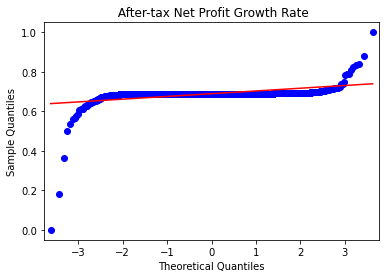

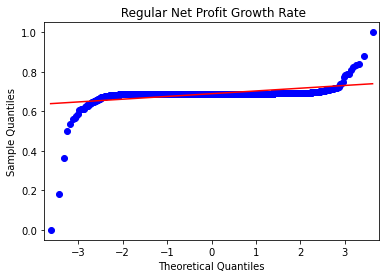

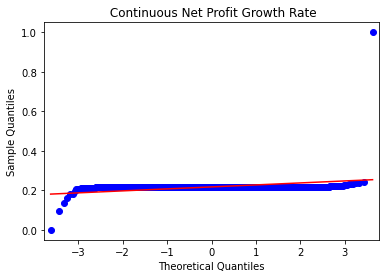

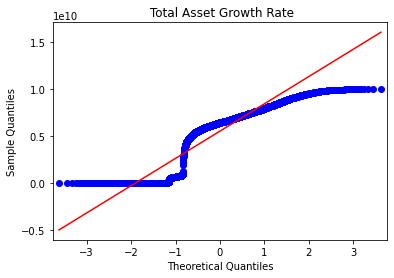

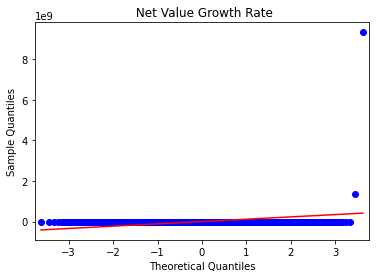

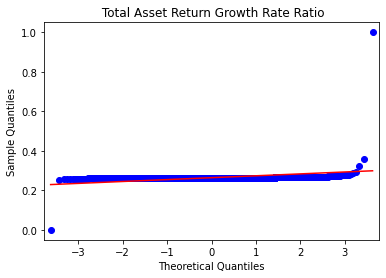

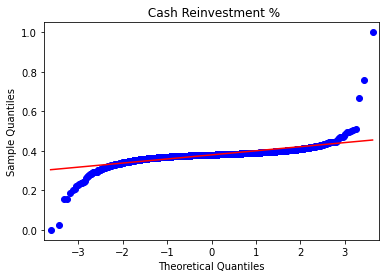

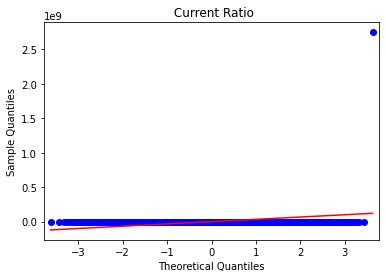

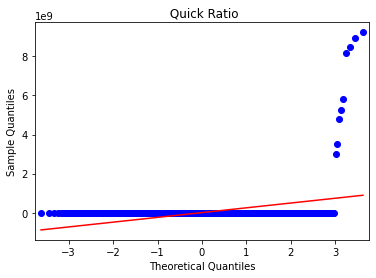

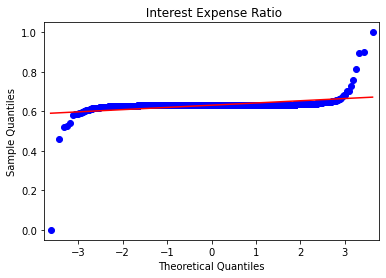

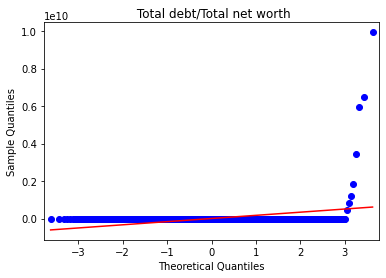

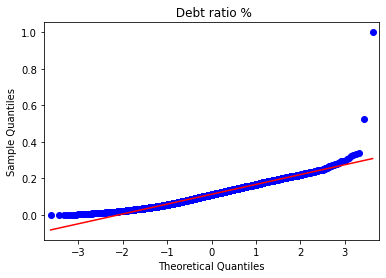

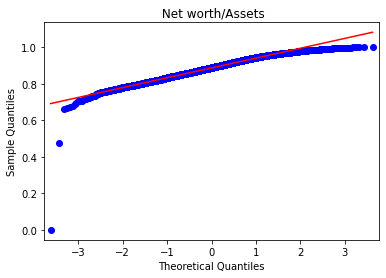

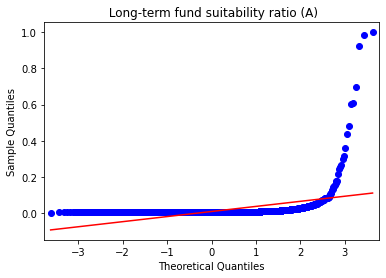

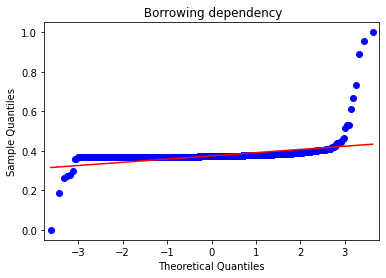

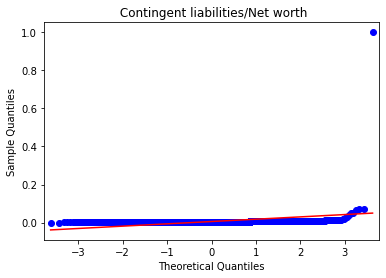

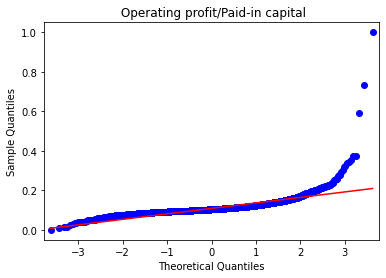

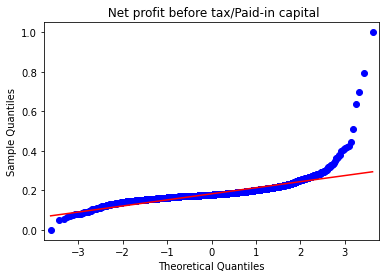

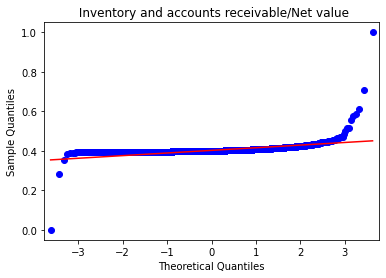

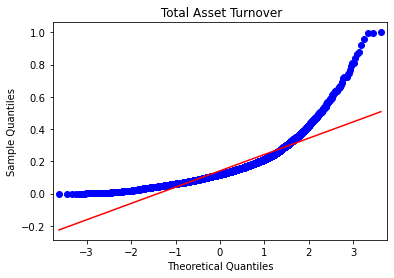

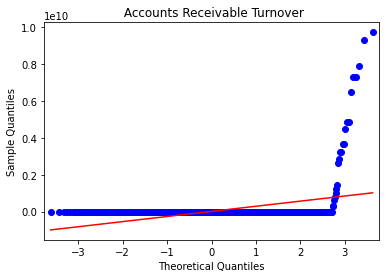

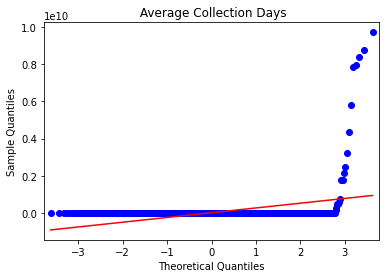

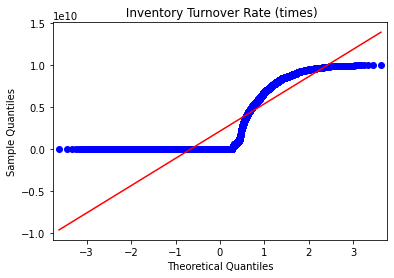

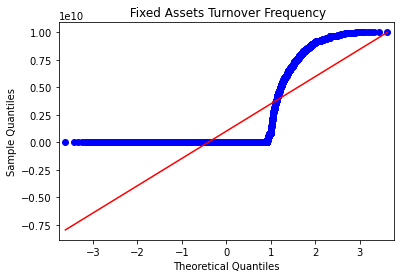

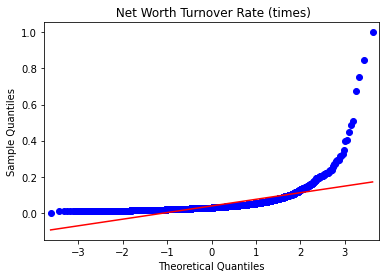

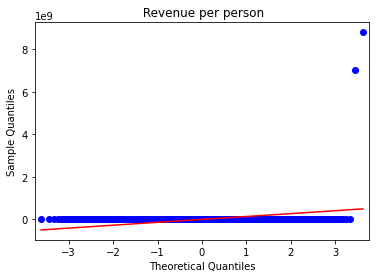

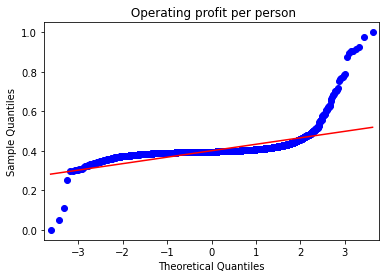

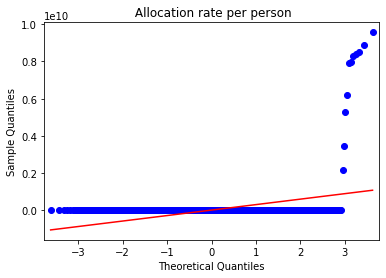

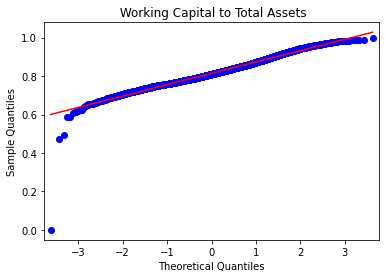

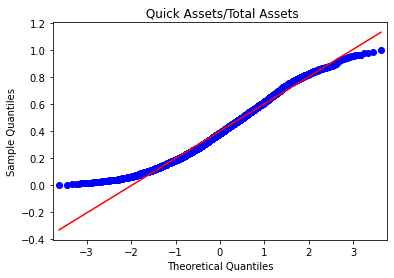

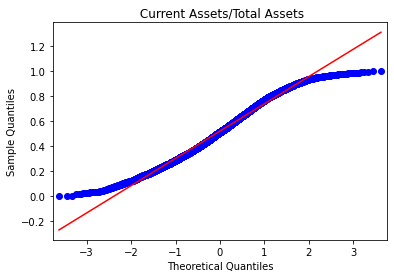

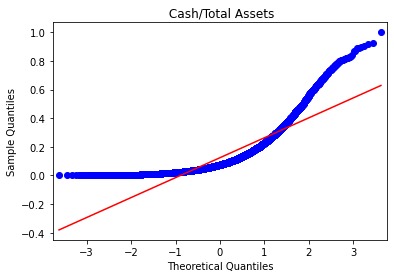

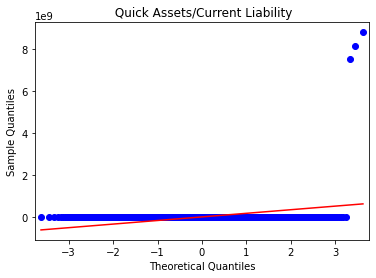

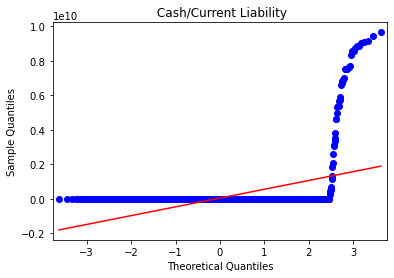

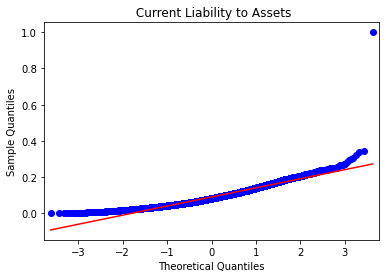

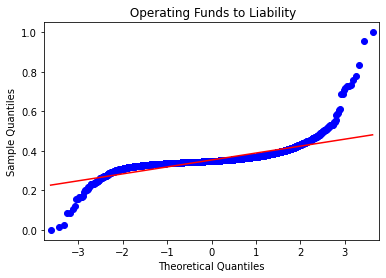

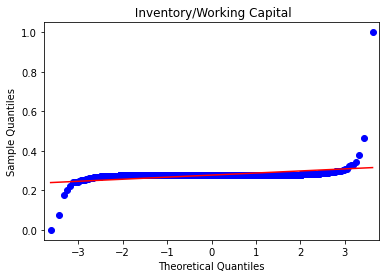

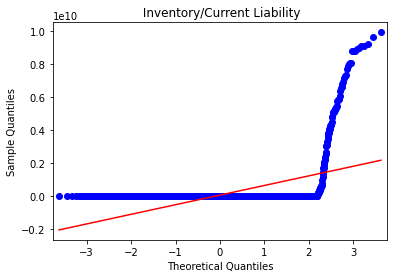

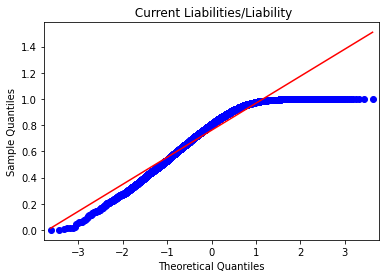

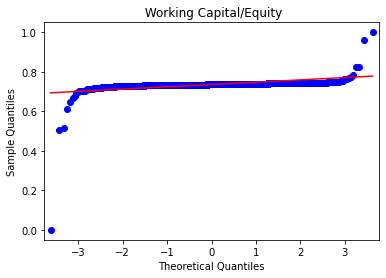

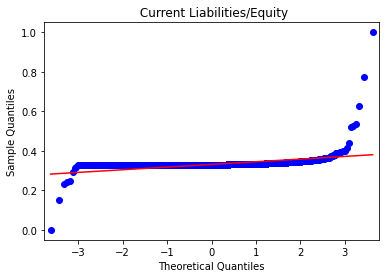

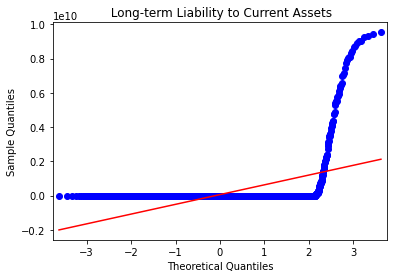

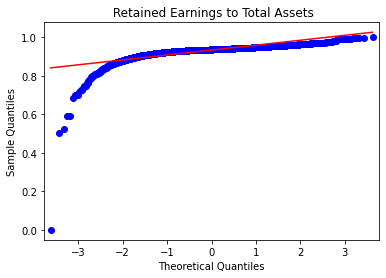

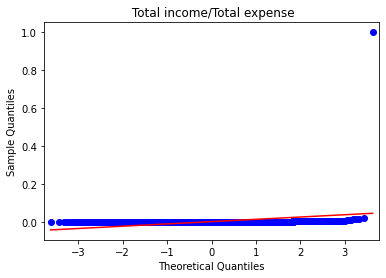

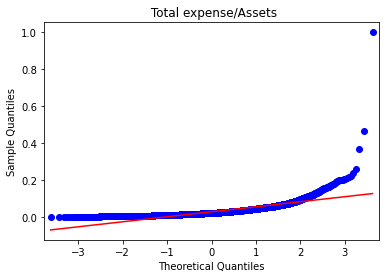

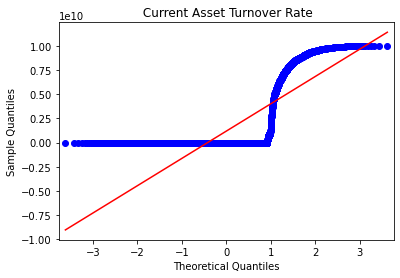

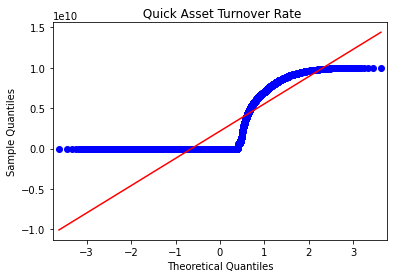

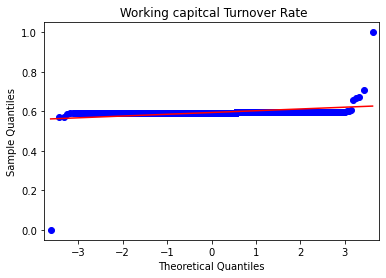

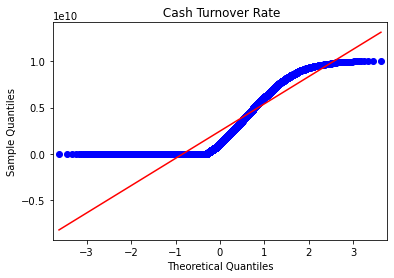

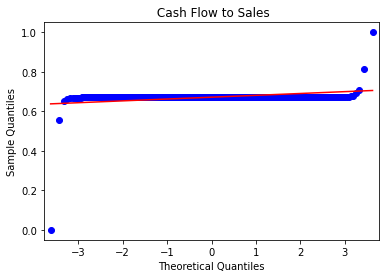

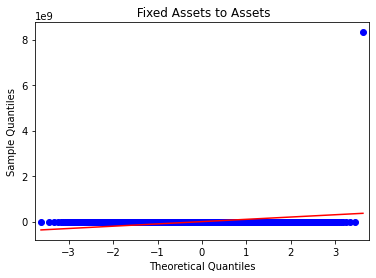

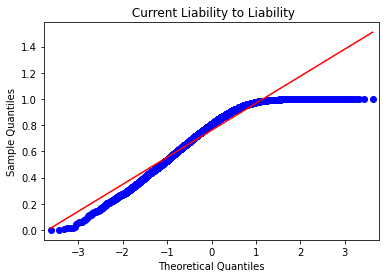

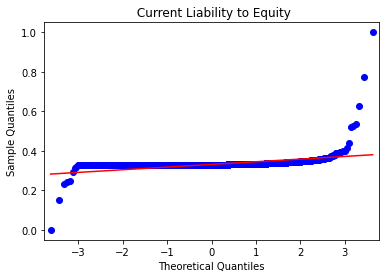

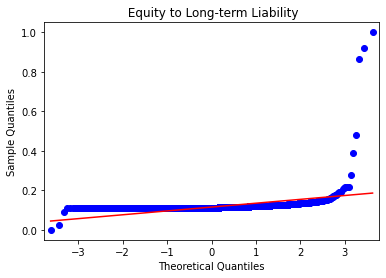

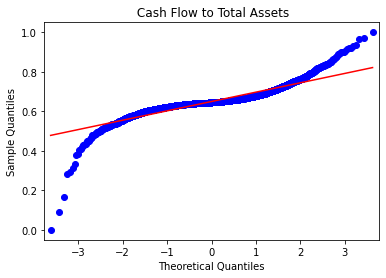

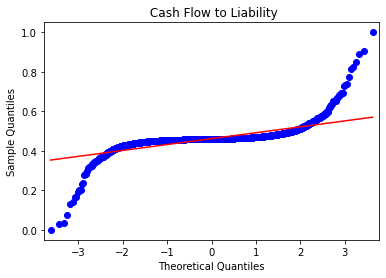

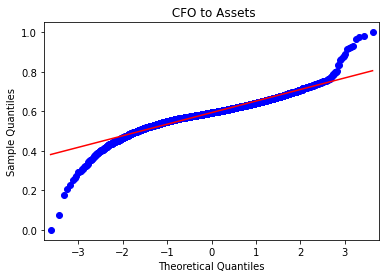

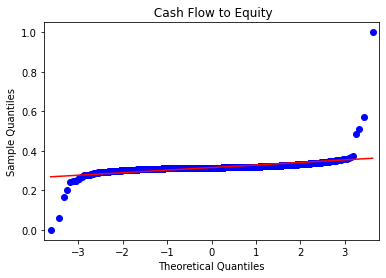

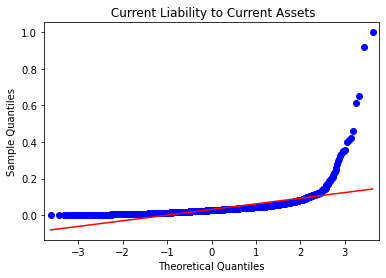

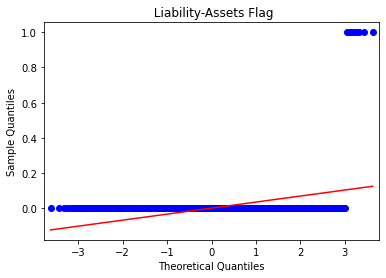

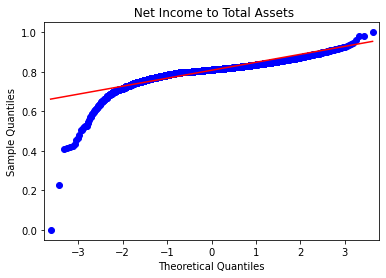

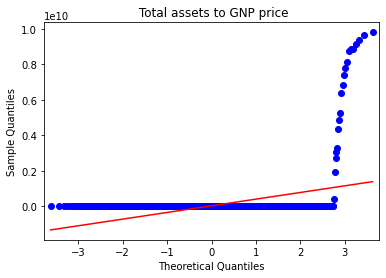

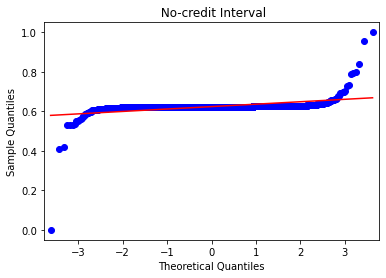

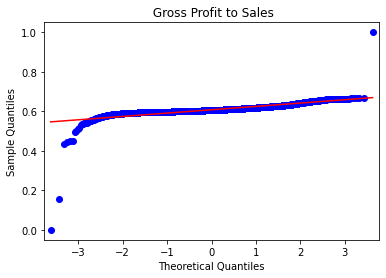

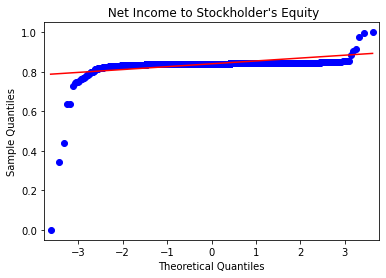

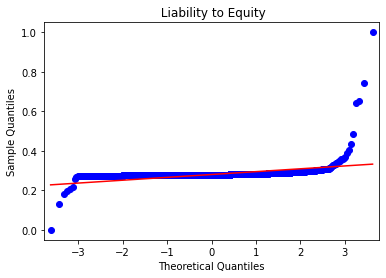

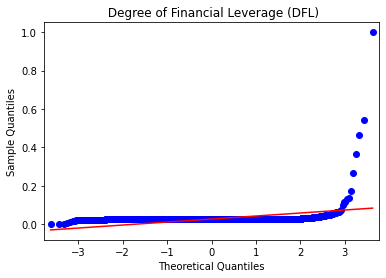

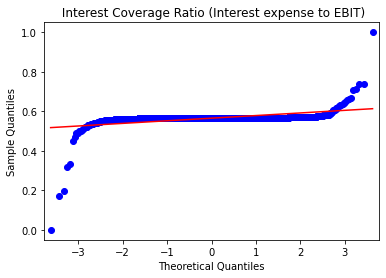

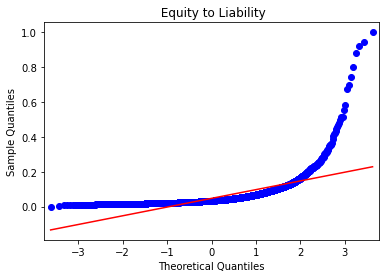

In [37]:
for col in X.columns:
#     pylab.figure(figsize=(3,32))
    qqplot(X[col],line="s")
    pylab.title(X[col].name)
    pylab.show()

### Recherche d'automatisation du scaling : disfit

In [39]:
# Initialize model
distfit = distfit(bins=25,alpha=0.02,stats='ks')

,distr,score,LLE,loc,scale,arg
0,dweibull,0.148617,NaN,0.643427,0.024678,"(0.8020649615781472,)"
1,t,0.807543,NaN,0.645518,0.017459,"(1.506763539627775,)"
2,genextreme,1.108472,NaN,0.630751,0.064891,"(0.1751343950801732,)"
3,gamma,1.828622,NaN,-0.098341,0.003426,"(218.37853512152674,)"
4,loggamma,1.828622,NaN,-10.028819,1.535962,"(1046.087111941589,)"
5,norm,2.250696,NaN,0.649731,0.047369,()
6,lognorm,2.250696,NaN,-16.310251,16.959968,"(0.002796677668383713,)"
7,beta,2.250696,NaN,-8.419196,16.762936,"(16822.21278010869, 14271.968182816447)"
8,expon,5.801256,NaN,0.0,0.649731,()
9,pareto,5.801256,NaN,-260059185.879355,260059185.879355,"(393137215.5730504,)"


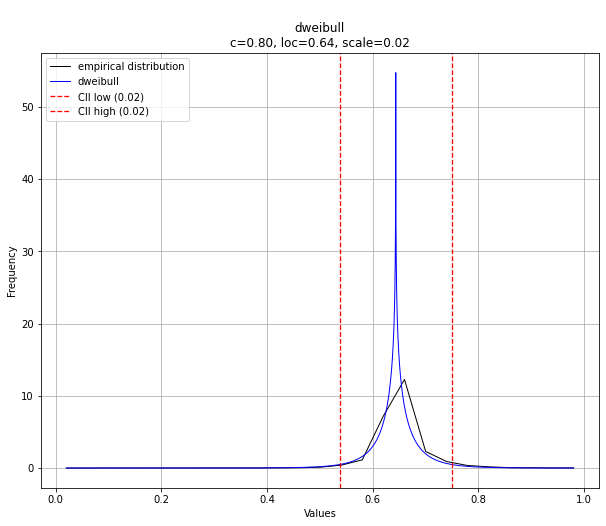

In [40]:
# Fit
distfit.fit_transform(X[" Cash Flow to Total Assets"],verbose=1)#Ah oups j'avais pas vu que ça fit_transform alors que j'ai pas encore séparé les données train-test
distfit.plot(verbose=1)
distfit.summary

In [41]:
distfit.summary [["distr","score"]].iloc[0]

distr    dweibull
score    0.148617
Name: 0, dtype: object

In [42]:
distfit.model

{'distr': <scipy.stats._continuous_distns.dweibull_gen at 0x23f31139d30>,
 'stats': 'ks',
 'params': (0.8020649615781472, 0.6434274656601882, 0.024678105180722033),
 'name': 'dweibull',
 'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x23f563a6f10>,
 'score': 0.14861694733027922,
 'loc': 0.6434274656601882,
 'scale': 0.024678105180722033,
 'arg': (0.8020649615781472,),
 'CII_min_alpha': 0.5374268962189696,
 'CII_max_alpha': 0.7494280351014068}

In [43]:
norm_dist=[]
t_dist=[]
lognorm_dist=[]
other_dist =[]

# distfit = distfit(bins=25,alpha=0.02,stats='ks')

for col in X.columns:
    distfit.fit_transform(X[col], verbose=1)
    if distfit.model['name']=='t':
        t_dist.append([col, distfit.model['score']])
    elif distfit.model['name']=='norm':
        norm_dist.append([col, distfit.model['score']])
    elif distfit.model['name']=='lognorm':
        lognorm_dist.append([col, distfit.model['score']])
    else:
        other_dist.append([col, distfit.model['score'],distfit.model['name']])

In [45]:
t_dist_df = pd.DataFrame(t_dist,columns=['feature','score'])
norm_dist_df = pd.DataFrame(norm_dist,columns=['feature','score'])
lognorm_dist_df = pd.DataFrame(lognorm_dist,columns=['feature','score'])
other_dist_df = pd.DataFrame(other_dist,columns=['feature','score','model'])

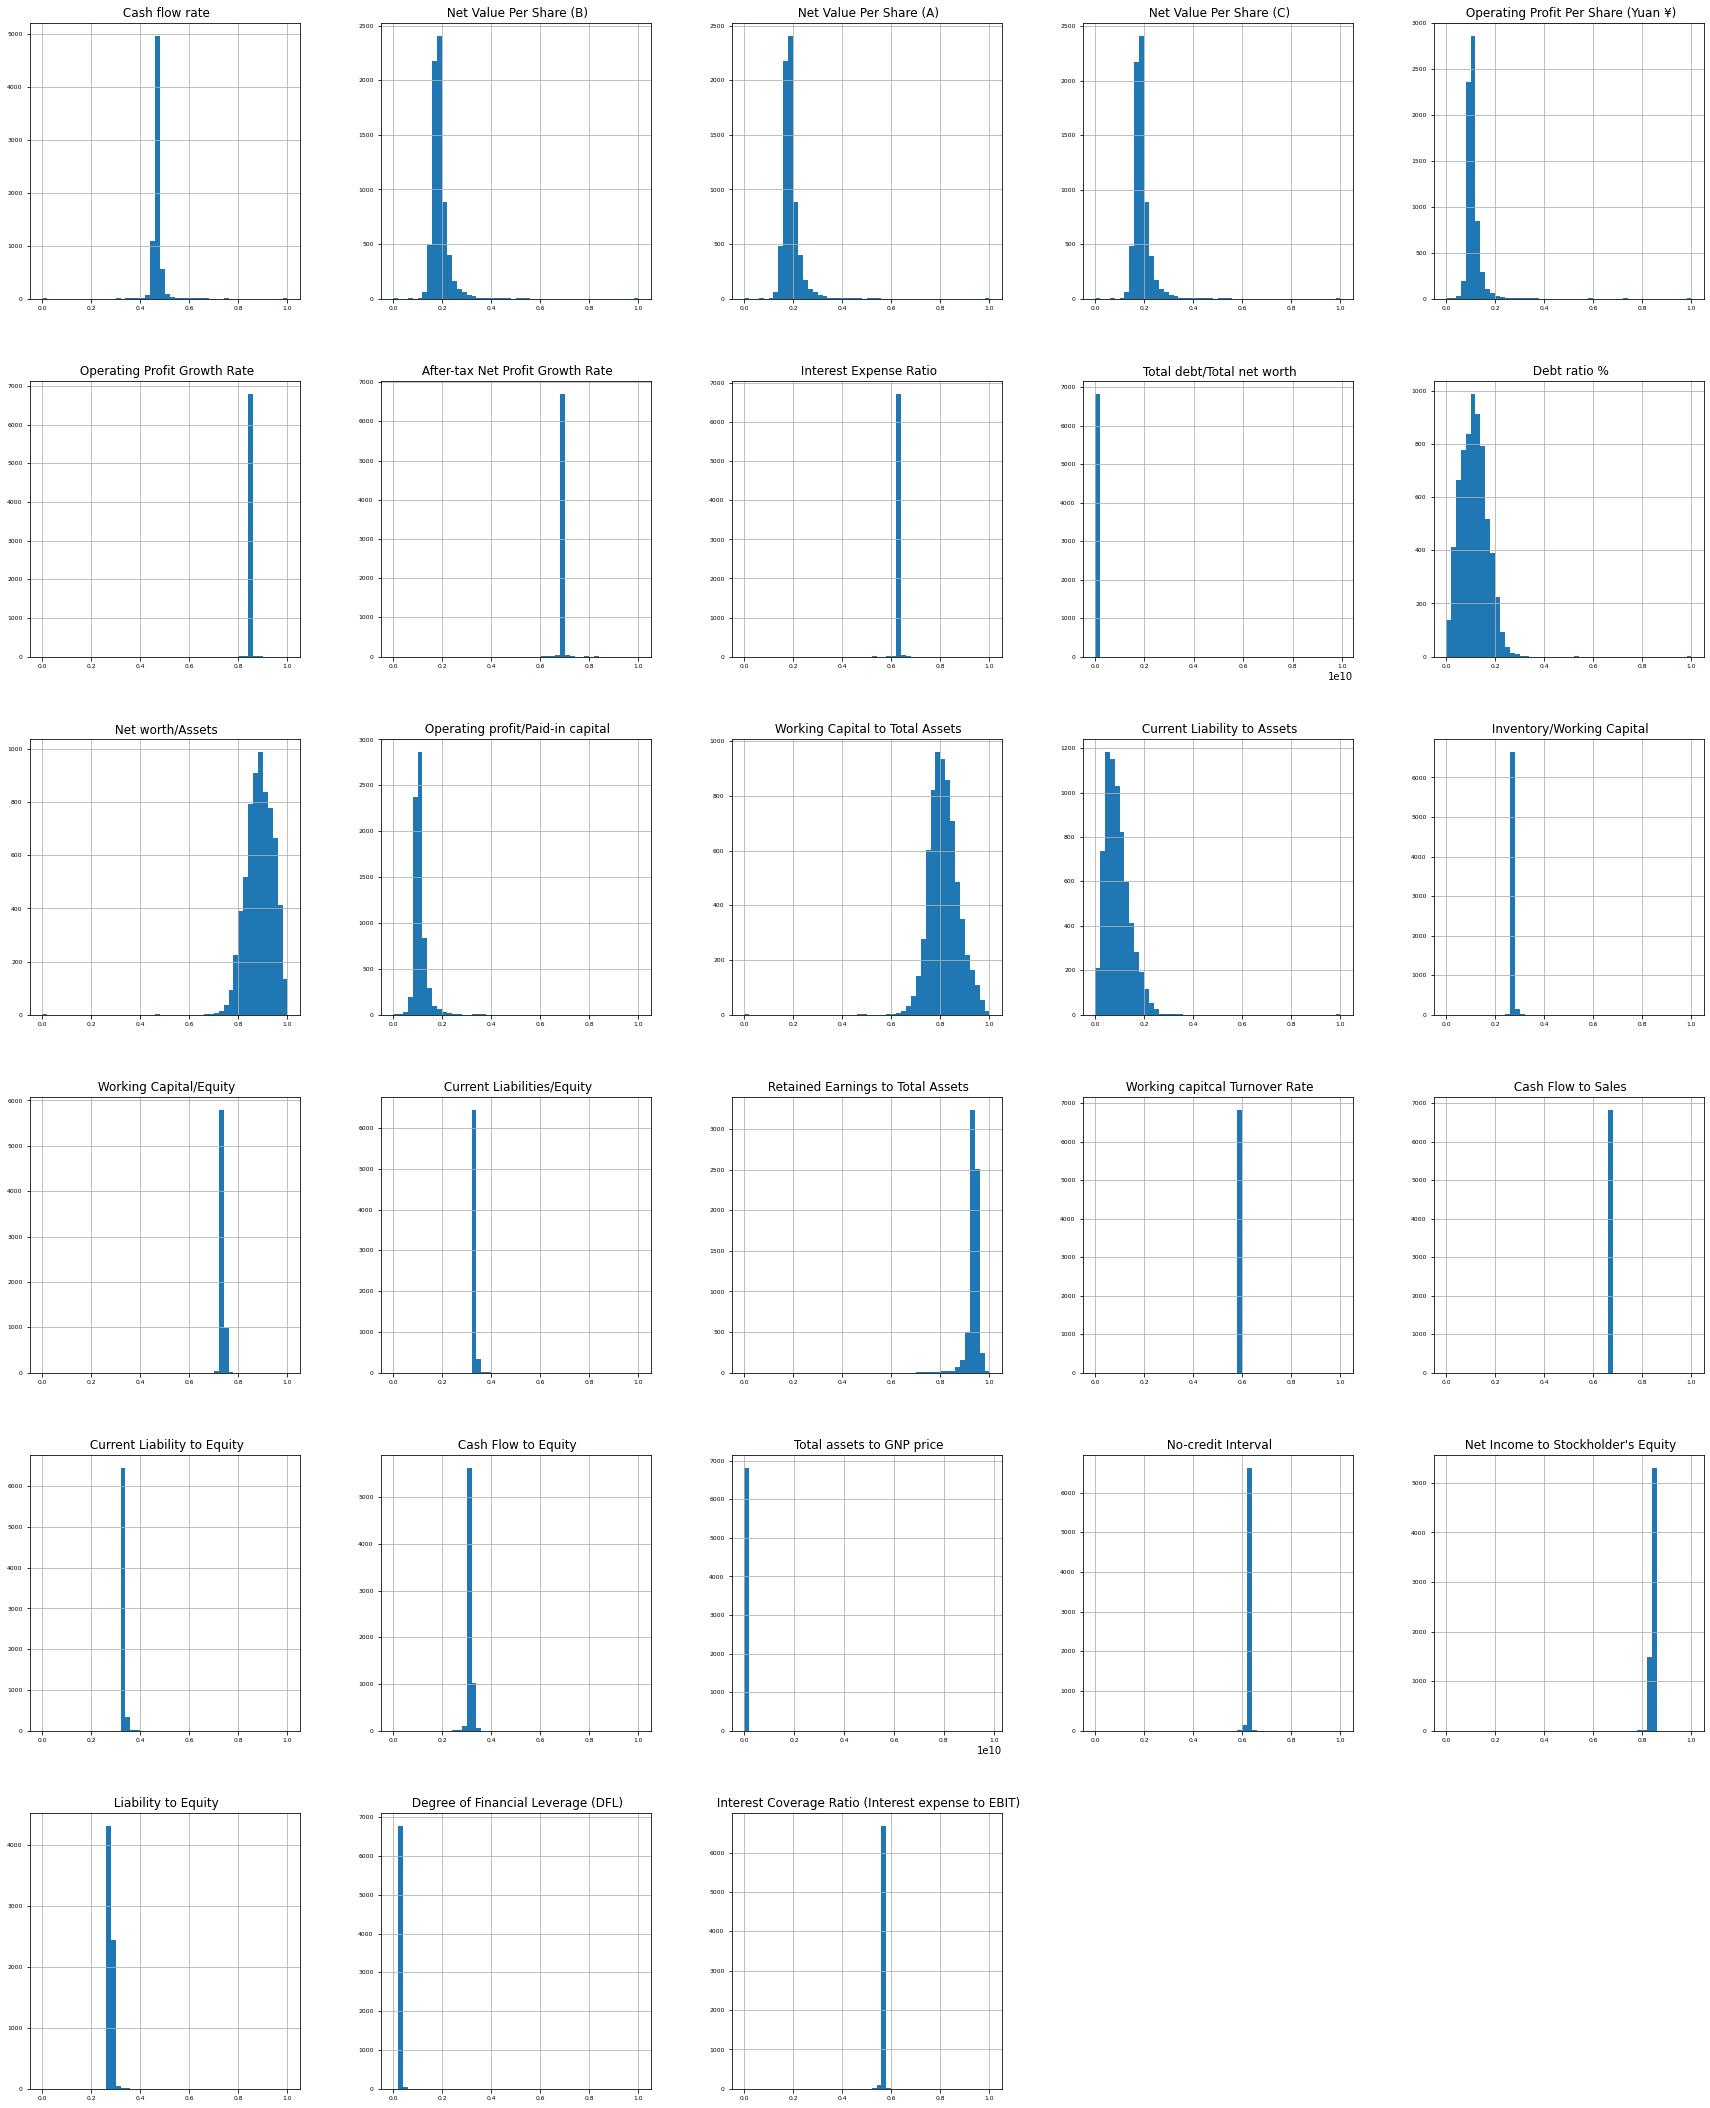

In [46]:
X[norm_dist_df['feature']].hist(figsize=(30,38), bins=50, xlabelsize=6,ylabelsize=6)
plt.show()

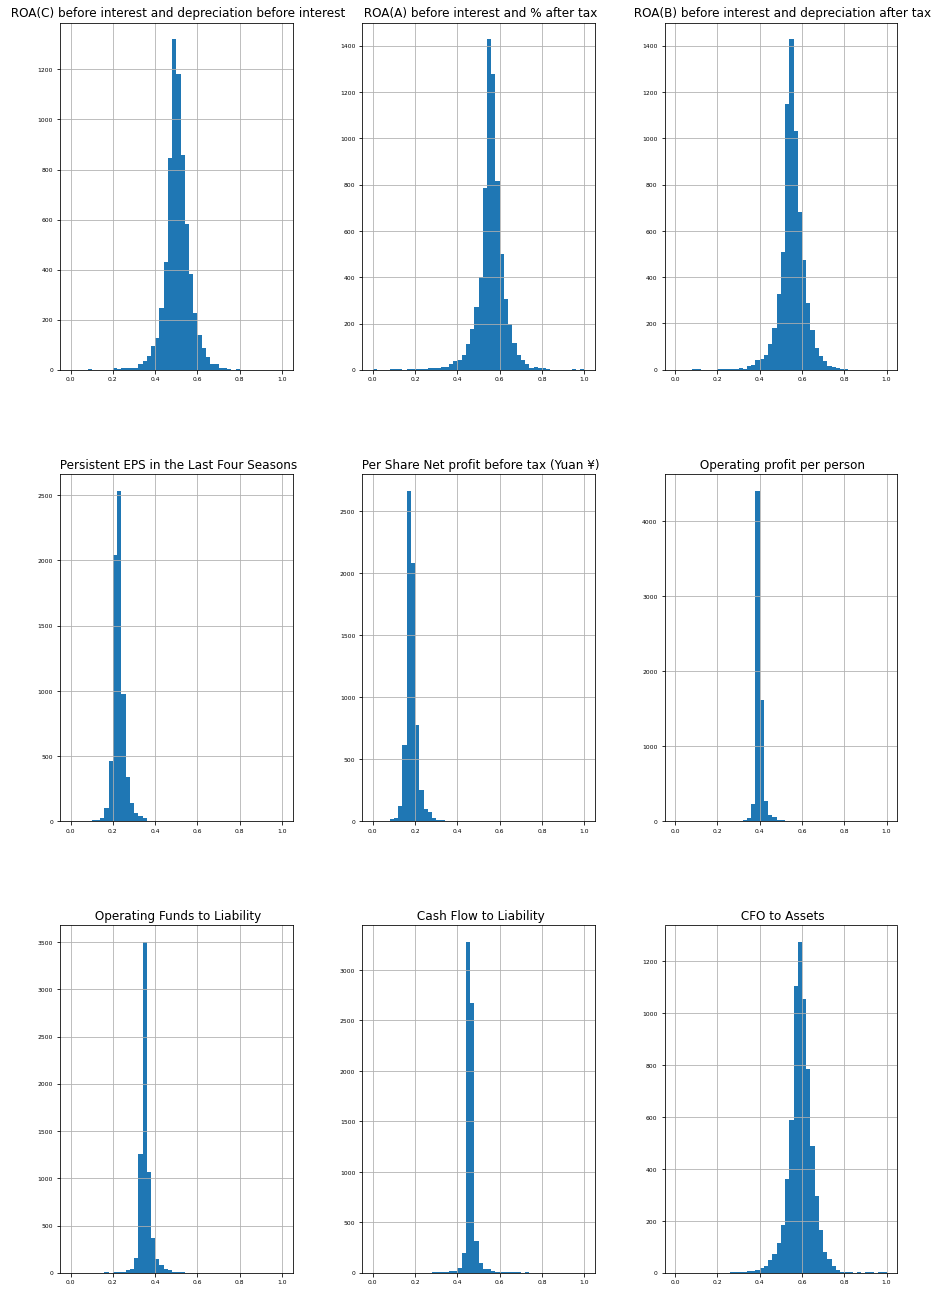

In [47]:
X[t_dist_df['feature']].hist(figsize=(15,23), bins=50, xlabelsize=6,ylabelsize=6)
plt.show()

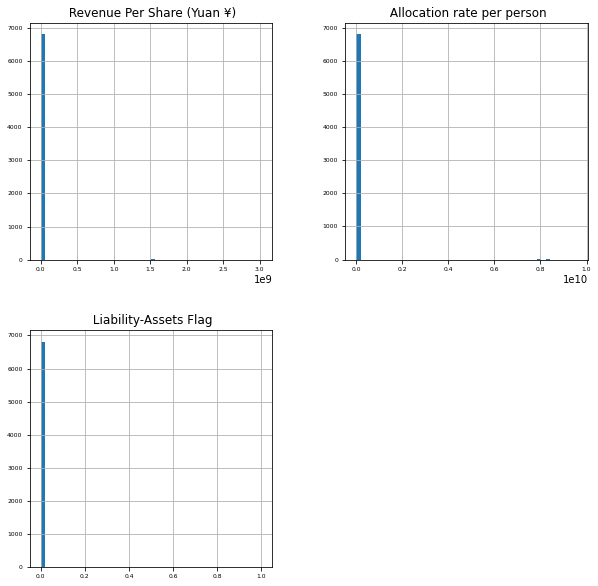

In [48]:
X[lognorm_dist_df['feature']].hist(figsize=(10,10), bins=50, xlabelsize=6,ylabelsize=6)
plt.show()

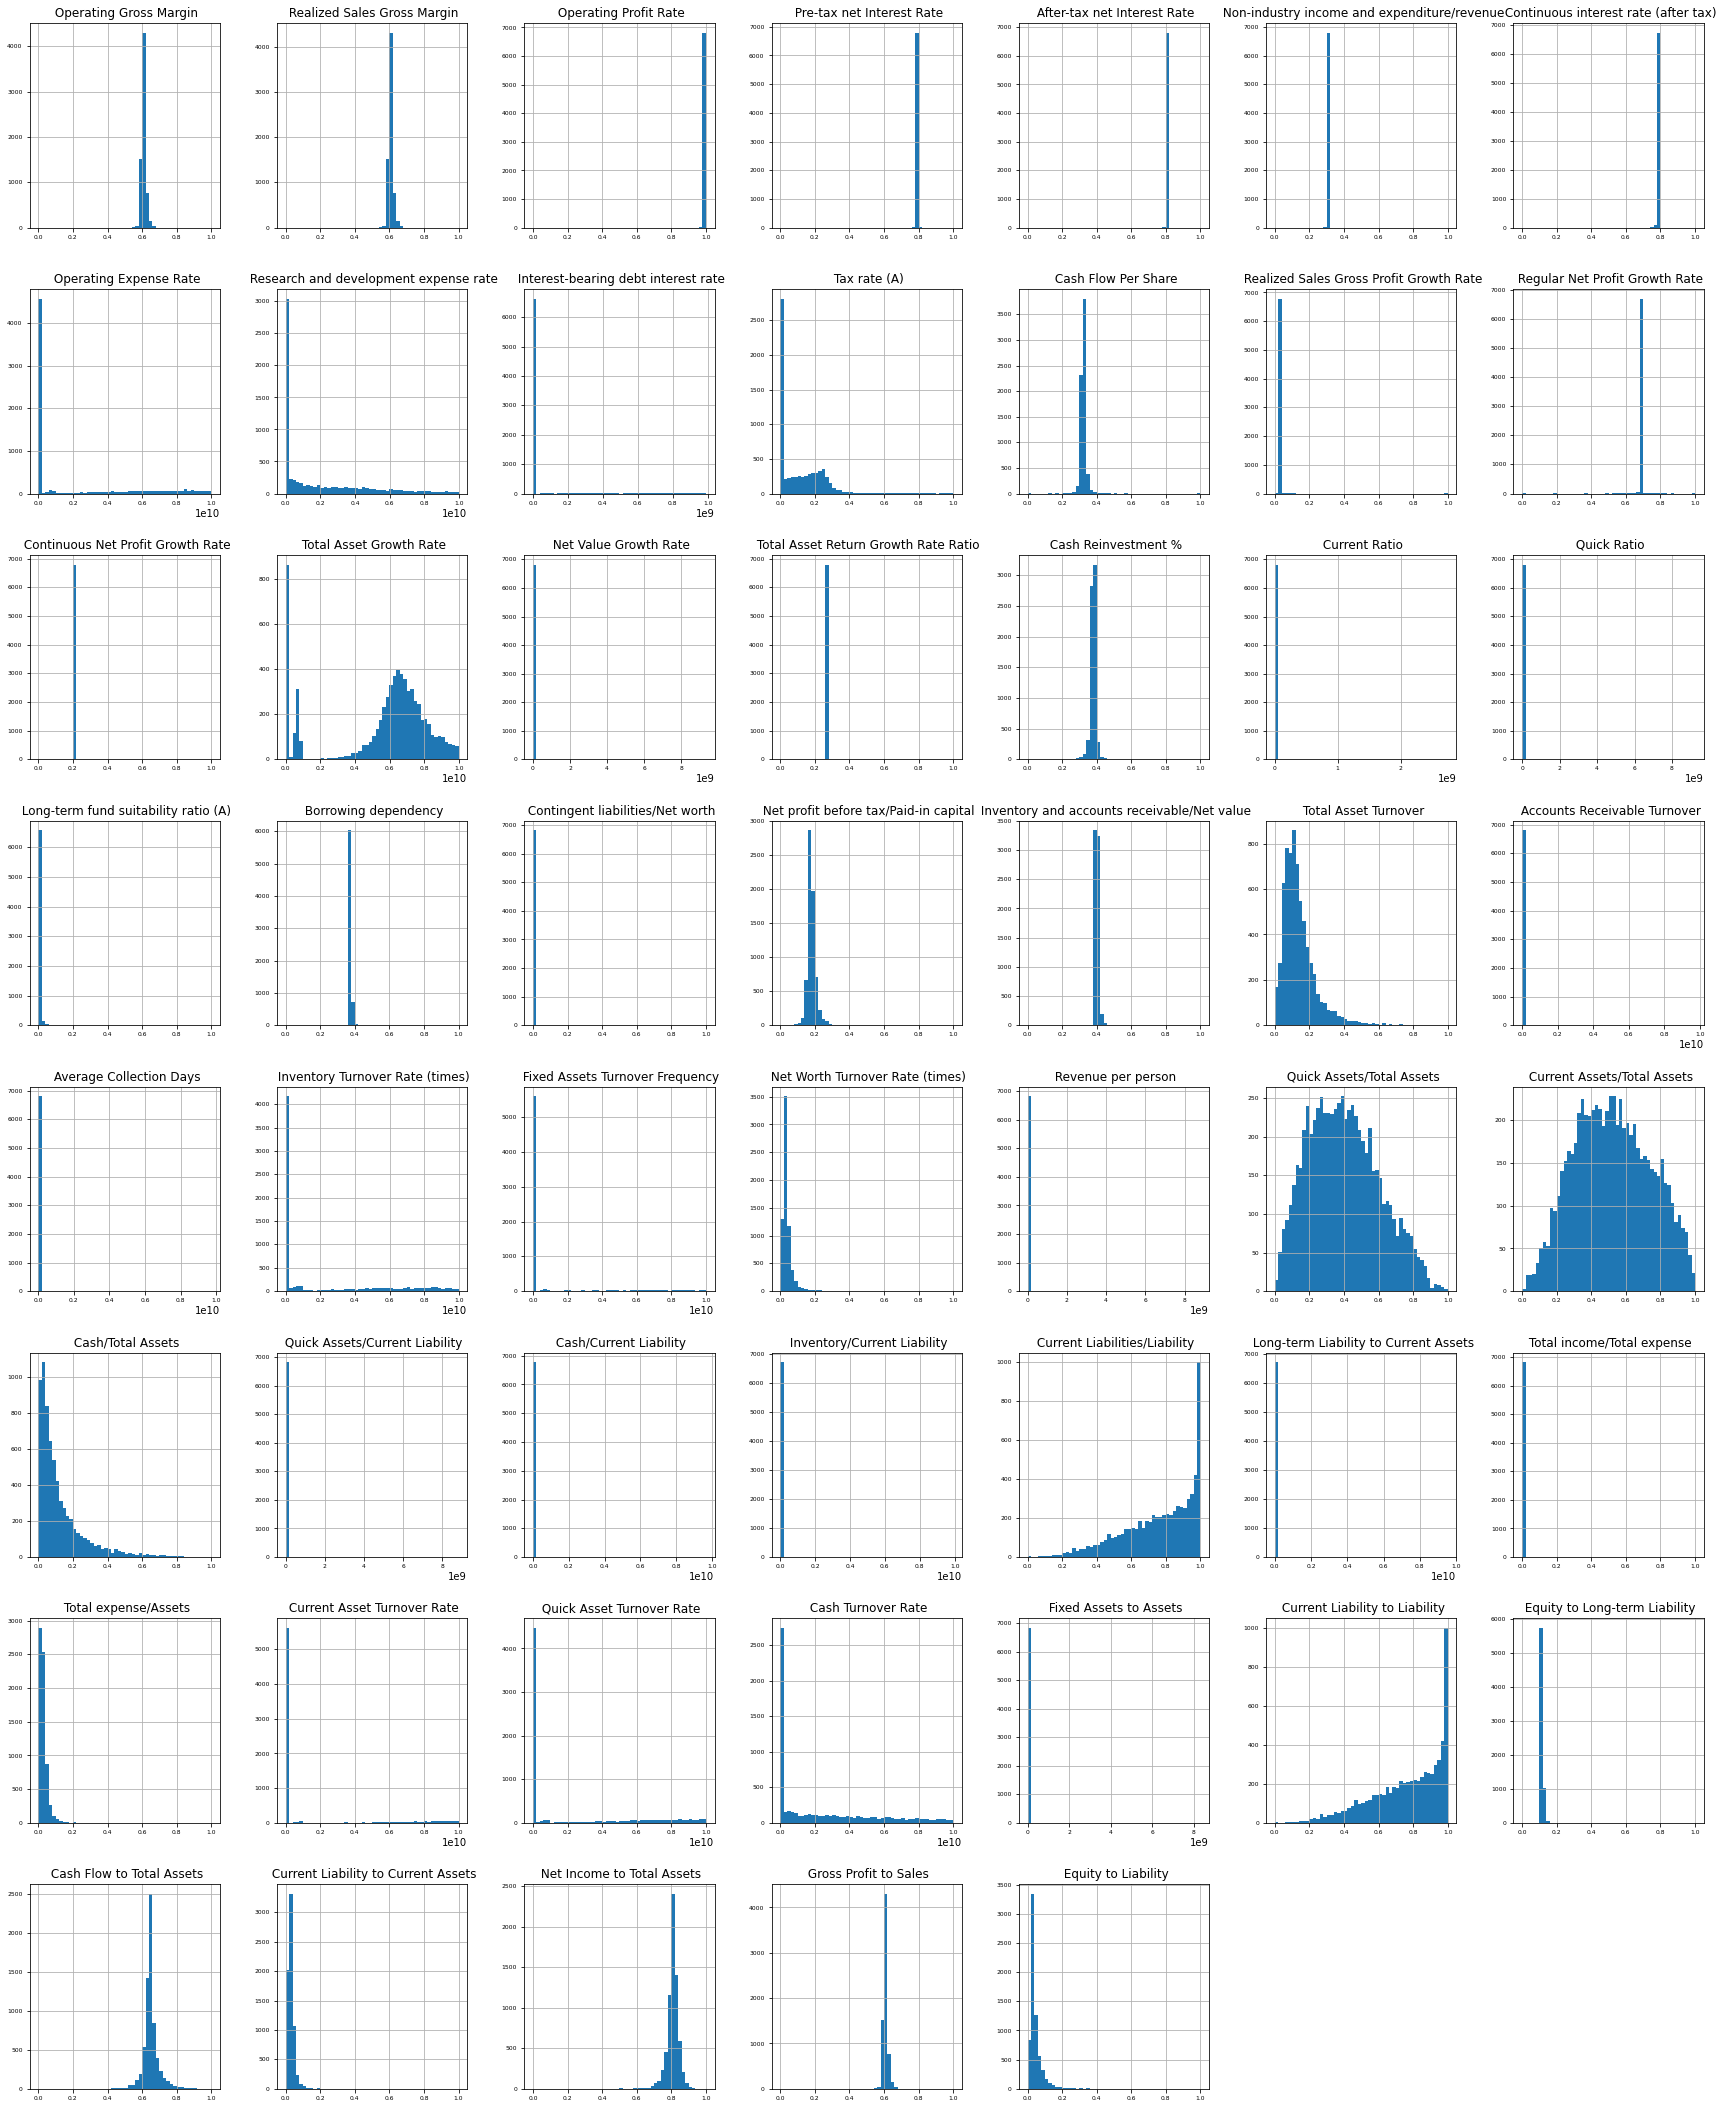

In [49]:
X[other_dist_df['feature']].hist(figsize=(30,38), bins=50, xlabelsize=6,ylabelsize=6)
plt.show()

### Scaling selon le groupe attibué par disfit

In [57]:
X = df.drop('Bankrupt?', axis=1)
y = df['Bankrupt?']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,stratify=y)

In [58]:
def log_scale(col):
    col = np.log1p(col)
    return col

In [59]:
mm_transformer = Pipeline(steps=[
       ('mm_scaler', MinMaxScaler())
])
ss_transformer = Pipeline(steps=[
       ('ss_scaler', StandardScaler())
])
rb_transformer = Pipeline(steps=[
       ('rb_scaler', RobustScaler())
])
log_transformer = Pipeline(steps=[
       ('log_transformer', FunctionTransformer(log_scale))
])

In [60]:
other_dist_list = list(other_dist_df['feature'])
norm_dist_list = list(norm_dist_df['feature'])
t_dist_list = list(t_dist_df['feature'])
lognorm_dist_list = list(lognorm_dist_df['feature'])

In [61]:
preprocessor = ColumnTransformer(
   transformers=[
    ('mm_transform', mm_transformer, other_dist_list)
    ,('ss_transform', ss_transformer, norm_dist_list)
    ,('rs_transform', rb_transformer, t_dist_list)
    ,('log_transform', log_transformer, lognorm_dist_list)
])

In [62]:
preprocess = Pipeline(steps=[('preprocessor', preprocessor)])

In [63]:
# training_transformed = preprocess.fit_transform(X_train)
# pd.DataFrame(training_transformed)

# Baseline model : LogisticRegression

In [64]:
pipe_logistic = Pipeline(steps = [
                ('preprocessor', preprocessor),
                ('logistic', LogisticRegression())
           ])

In [65]:
pipe_logistic.fit(X_train,y_train)
cross_val_score(pipe_logistic,X_train, y_train,cv=5,scoring='recall').mean()

0.21818181818181817

In [66]:
pipe_logistic_ypred = pipe_logistic.predict(X_test)
print(confusion_matrix(y_test,pipe_logistic_ypred))
print('')
print(classification_report(y_test,pipe_logistic_ypred))

[[1637   13]
 [  44   11]]

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1650
           1       0.46      0.20      0.28        55

    accuracy                           0.97      1705
   macro avg       0.72      0.60      0.63      1705
weighted avg       0.96      0.97      0.96      1705



# Balancing : SMOTE

In [68]:
pipe_logistic2 = imbpipeline(steps = [
                ('preprocessor', preprocessor),
                ('smote', SMOTE(random_state=11)),
                ('logistic', LogisticRegression())
           ])

In [69]:
pipe_logistic2.fit(X_train,y_train)
cross_val_score(pipe_logistic,X_train, y_train,cv=5,scoring='recall').mean()

0.21818181818181817

In [70]:
pipe_logistic2_ypred = pipe_logistic2.predict(X_test)
print(confusion_matrix(y_test,pipe_logistic2_ypred))
print('')
print(classification_report(y_test,pipe_logistic2_ypred))

[[1455  195]
 [  17   38]]

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1650
           1       0.16      0.69      0.26        55

    accuracy                           0.88      1705
   macro avg       0.58      0.79      0.60      1705
weighted avg       0.96      0.88      0.91      1705



# KNN

In [89]:
knn = imbpipeline(steps = [
                ('preprocessor', preprocessor),
                ('smote', SMOTE(random_state=11)),
                ('knn', KNeighborsClassifier())
           ])

In [90]:
knn.fit(X_train,y_train)
cross_val_score(knn,X_train, y_train,cv=5,scoring='recall').mean()

0.7212121212121213

In [91]:
knn_ypred = knn.predict(X_test)
print(confusion_matrix(y_test,knn_ypred))
print('')
print(classification_report(y_test,knn_ypred))

[[1454  196]
 [  15   40]]

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1650
           1       0.17      0.73      0.27        55

    accuracy                           0.88      1705
   macro avg       0.58      0.80      0.60      1705
weighted avg       0.96      0.88      0.91      1705



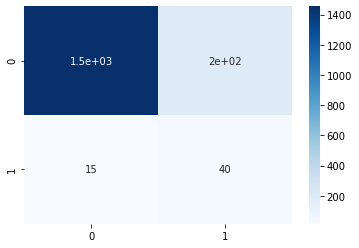

In [104]:
sns.heatmap(confusion_matrix(y_test,knn_ypred), annot=True, cmap='Blues');

# Decision Tree

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier

In [72]:
decision_tree = imbpipeline(steps = [
                ('preprocessor', preprocessor),
                ('smote', SMOTE(random_state=11)),
                ('decision_tree', DecisionTreeClassifier())
           ])

In [73]:
decision_tree.fit(X_train,y_train)
cross_val_score(decision_tree,X_train, y_train,cv=5,scoring='recall').mean()

0.4424242424242425

In [74]:
decision_tree_ypred = decision_tree.predict(X_test)
print(confusion_matrix(y_test,decision_tree_ypred))
print('')
print(classification_report(y_test,decision_tree_ypred))

[[1557   93]
 [  29   26]]

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1650
           1       0.22      0.47      0.30        55

    accuracy                           0.93      1705
   macro avg       0.60      0.71      0.63      1705
weighted avg       0.96      0.93      0.94      1705



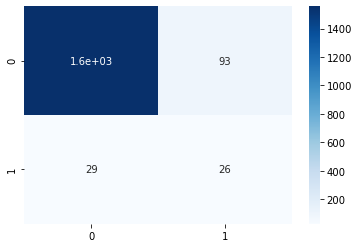

In [75]:
sns.heatmap(confusion_matrix(y_test,decision_tree_ypred), annot=True, cmap='Blues');

# SVC

In [85]:
svc = imbpipeline(steps = [
                ('preprocessor', preprocessor),
                ('smote', SMOTE(random_state=11)),
                ('svc', SVC())
           ])

In [86]:
svc.fit(X_train,y_train)
cross_val_score(svc,X_train, y_train,cv=5,scoring='recall').mean()

0.7212121212121213

In [87]:
svc_ypred = svc.predict(X_test)
print(confusion_matrix(y_test,svc_ypred))
print('')
print(classification_report(y_test,svc_ypred))

[[1452  198]
 [  15   40]]

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1650
           1       0.17      0.73      0.27        55

    accuracy                           0.88      1705
   macro avg       0.58      0.80      0.60      1705
weighted avg       0.96      0.88      0.91      1705



# Random Forest

In [77]:
random_forest = imbpipeline(steps = [
                ('preprocessor', preprocessor),
                ('smote', SMOTE(random_state=11)),
                ('random_forest', RandomForestClassifier())
           ])

In [78]:
random_forest.fit(X_train,y_train)
cross_val_score(random_forest,X_train, y_train,cv=5,scoring='recall').mean()

0.4424242424242425

In [79]:
random_forest_ypred = random_forest.predict(X_test)
print(confusion_matrix(y_test,random_forest_ypred))
print('')
print(classification_report(y_test,random_forest_ypred))

[[1603   47]
 [  28   27]]

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1650
           1       0.36      0.49      0.42        55

    accuracy                           0.96      1705
   macro avg       0.67      0.73      0.70      1705
weighted avg       0.96      0.96      0.96      1705



# AdaBoost

In [81]:
adaboost = imbpipeline(steps = [
                ('preprocessor', preprocessor),
                ('smote', SMOTE(random_state=11)),
                ('adaboost', AdaBoostClassifier())
           ])

In [82]:
adaboost.fit(X_train,y_train)
cross_val_score(adaboost,X_train, y_train,cv=5,scoring='recall').mean()

0.593939393939394

In [83]:
adaboost_ypred = adaboost.predict(X_test)
print(confusion_matrix(y_test,adaboost_ypred))
print('')
print(classification_report(y_test,adaboost_ypred))

[[1527  123]
 [  21   34]]

              precision    recall  f1-score   support

           0       0.99      0.93      0.95      1650
           1       0.22      0.62      0.32        55

    accuracy                           0.92      1705
   macro avg       0.60      0.77      0.64      1705
weighted avg       0.96      0.92      0.93      1705



# Stacking

In [97]:
dic = {'SVC': svc_ypred, 'KNN': knn_ypred, 'Reg Logist': pipe_logistic2_ypred}
pred_models = pd.DataFrame(dic)
pred_models_corr = pred_models.corr()
# Unstack correlation matrix 
pred_models_corr = pred_models_corr.unstack().reset_index() 
pred_models_corr

# rename columns
pred_models_corr.columns = ['feature_1','feature_2', 'correlation'] 

# sort by correlation
pred_models_corr.sort_values(by="correlation",ascending=False, inplace=True) 

# Remove self correlation
pred_models_corr = pred_models_corr[pred_models_corr['feature_1'] != pred_models_corr['feature_2']]
pred_models_corr

,feature_1,feature_2,correlation
2,SVC,Reg Logist,0.800529
6,Reg Logist,SVC,0.800529
1,SVC,KNN,0.593258
3,KNN,SVC,0.593258
5,KNN,Reg Logist,0.557491
7,Reg Logist,KNN,0.557491


In [99]:
estimators = [
    ('svc', svc),
    ('lr', pipe_logistic2),
    ('knn', knn)
]

In [100]:
clf = StackingClassifier(estimators=estimators, final_estimator=KNeighborsClassifier())

In [101]:
clf.fit(X_train,y_train)
cross_val_score(clf,X_train, y_train,cv=5,scoring='recall').mean()

0.12121212121212119

In [103]:
clf_ypred = clf.predict(X_test)
print(confusion_matrix(y_test,clf_ypred))
print('')
print(classification_report(y_test,clf_ypred))

[[1636   14]
 [  45   10]]

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1650
           1       0.42      0.18      0.25        55

    accuracy                           0.97      1705
   macro avg       0.69      0.59      0.62      1705
weighted avg       0.96      0.97      0.96      1705



# Feature selection

In [56]:
# # Perform Permutation
# permutation_score = permutation_importance(knn,
#                                            X_test, y_test,
#                                            scoring='recall',
#                                            random_state=3,
#                                            n_repeats=100) 

# # Unstack results
# importance_df = pd.DataFrame(np.vstack((X.columns,
#                                         permutation_score.importances_mean)).T) 

# importance_df.columns=['feature','feature importance']

# # Order by importance
# importance_df.sort_values(by="feature importance", ascending = False) 

# Model Tuning sur KNN

In [114]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import random

In [115]:
space = {
    'knn__n_neighbors': random.randint(3, int(round(np.sqrt(len(X_train.index))))),
    'knn__weights':['uniform', 'distance'],
    'knn__metric': ['euclidean','manhattan']
}

In [94]:
knn.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'smote', 'knn', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__mm_transform', 'preprocessor__ss_transform', 'preprocessor__rs_transform', 'preprocessor__log_transform', 'preprocessor__mm_transform__memory', 'preprocessor__mm_transform__steps', 'preprocessor__mm_transform__verbose', 'preprocessor__mm_transform__mm_scaler', 'preprocessor__mm_transform__mm_scaler__clip', 'preprocessor__mm_transform__mm_scaler__copy', 'preprocessor__mm_transform__mm_scaler__feature_range', 'preprocessor__ss_transform__memory', 'preprocessor__ss_transform__steps', 'preprocessor__ss_transform__verbose', 'preprocessor__ss_transform__ss_scaler', 'preprocessor__ss_transform__ss_scaler__copy', 'preprocessor__ss_transform__ss_scaler__with_mean', 'preprocessor__ss_transform__ss_scaler__with_std', 'preprocessor__rs_t

In [116]:
randomS = RandomizedSearchCV(knn, param_distributions = space, n_iter=500, n_jobs=-1, cv=5, random_state=0, verbose=3)#n_jobs=-1 permet d'utiliser toutes les capacités de la machine
randomS.fit(X_train, y_train)

TypeError: Parameter value is not iterable or distribution (key='knn__n_neighbors', value=64)

# Pickle

In [113]:
with open("model.pkl", "wb") as file:
    pickle.dump(knn, file)